# Does the Tourism Preferences Changes after COVID19?

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucfnjji, ucfnlun, ucfnpar, ucfnrli.

## Importing Modules

In [1]:
# Import required libraries

# Import visualisation modules
import matplotlib as mpl 
%matplotlib inline 
import matplotlib.pyplot as plt 

#Import modules
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as ctx

#Import datareading modules
import fiona
import urllib
from urllib.request import urlopen
import csv
import os
import tempfile
import shutil
from pathlib import Path

import warnings 
warnings.simplefilter(action='ignore')
ox.__version__

'1.2.2'

## Data and Pre-processing
Our project topic is about Tourism Development in London Post-COVID19.

The project is to make policy suggestion t Mayor of London to support Tourism Development Plan that are published in ___.

Research question:

Scope of Work:

Our data includes:
1. Airbnb listing Data Year of from [Inside Airbnb website](http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/visualisations/listings.csv)
2. Airbnb Listing Data Year of from [Inside Airbnb website](http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/visualisations/listings.csv) archived by Dr. Jonathan Reades.
2. Tourism Attraction Data which is scrapped from [OpenStreetMap](https://www.openstreetmap.org/#map=19/51.52168/-0.13252)
3. Greenspace Data from [Ordnance Survey]()
4. Population Data from [Office of National Statistics (ONS) UK Government]()


### Population Density Data

#### Accesssing Population Density Data

In [2]:
# Read the file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/population_density_2022.csv"
pd_df= pd.read_csv(url, sep=";")

pd_df.head(5)

Codes           Names               Borough Population  Hectares  \
0  E09000001  City of London        City of London          0     315.1   
1  E05000026           Abbey  Barking and Dagenham      8,289     127.9   
2  E05000027          Alibon  Barking and Dagenham     17,574     136.1   
3  E05000028       Becontree  Barking and Dagenham     11,324     128.4   
4  E05000029  Chadwell Heath  Barking and Dagenham     14,751     338.0   

  Square Kilometres  Population per hectare Population per square kilometre  \
0               3.2                     0.0                               0   
1               1.3                    64.8                           6,481   
2               1.4                   129.1                          12,913   
3               1.3                    88.2                           8,819   
4               3.4                    43.6                           4,364   

   Unnamed: 8 Census population (2011)  Population per hectare.1  
0         NaN                    7,375                      23.4  
1         NaN                   12,786                     100.0  
2         NaN                   10,385                      76.3  
3         NaN                   11,545                      89.9  
4         NaN                   10,021                      29.6

In [3]:
pd_rename = pd_df.rename(columns = {'Codes':'GSS_CODE'}, inplace = True)
pd_rename = pd_df.rename(columns = {'Population per square kilometre':'pop_density'}, inplace = True)

pd_df.head()

GSS_CODE           Names               Borough Population  Hectares  \
0  E09000001  City of London        City of London          0     315.1   
1  E05000026           Abbey  Barking and Dagenham      8,289     127.9   
2  E05000027          Alibon  Barking and Dagenham     17,574     136.1   
3  E05000028       Becontree  Barking and Dagenham     11,324     128.4   
4  E05000029  Chadwell Heath  Barking and Dagenham     14,751     338.0   

  Square Kilometres  Population per hectare pop_density  Unnamed: 8  \
0               3.2                     0.0           0         NaN   
1               1.3                    64.8       6,481         NaN   
2               1.4                   129.1      12,913         NaN   
3               1.3                    88.2       8,819         NaN   
4               3.4                    43.6       4,364         NaN   

  Census population (2011)  Population per hectare.1  
0                    7,375                      23.4  
1                   12,786                     100.0  
2                   10,385                      76.3  
3                   11,545                      89.9  
4                   10,021                      29.6

### Tourism Attraction Data

#### Scrapping Tourism Attraction Data
We followed the instruction from this [tutorial]() to scrap tourism attraction Point of Interest(POI)s from OpenStreetMap website. 

The notebook demonstrates the process of gathering local amenity data from OpenStreetMap. Local amenity data of this sort could be used to improve the accuracy of a whole range of ML models. In this notebook, the idea is that that presence of these amenities could help us predict what an AirBnb host might charge.

The notebook covered "How to make basic requests from OpenStreetMap using OSMnx", -author.

In [4]:
# Set up query
query = {'tourism':'attraction'}

# Run query
# Jin: I change ox.pois.pois_from_place to ox.geometries.geometries_from_place, for the adjustment of osmnx version change.
# details: https://stackoverflow.com/questions/71559143/what-happened-to-the-pois-module-in-osmnx-and-what-to-use-now
tourist_attraction = ox.geometries.geometries_from_place(
            'Greater London, UK',
            tags = query,
            which_result=1)

tourist_attraction.head(5)

historic                      name     tourism  \
element_type osmid                                                       
node         25524252   building           Blewcoat School  attraction   
             26559743        NaN                       NaN  attraction   
             252602371       NaN  London Bridge Experience  attraction   
             269236138       NaN      Little Holland House  attraction   
             293221901       NaN    Hall Place and Gardens  attraction   

                        wikidata                        wikipedia  \
element_type osmid                                                  
node         25524252   Q4926413               en:Blewcoat School   
             26559743        NaN                              NaN   
             252602371  Q7748032  en:The London Bridge Experience   
             269236138       NaN                              NaN   
             293221901  Q5642615                              NaN   

                                         geometry access barrier bicycle  \
element_type osmid                                                         
node         25524252   POINT (-0.13606 51.49830)    NaN     NaN     NaN   
             26559743   POINT (-0.14525 51.39520)    NaN     NaN     NaN   
             252602371  POINT (-0.08826 51.50639)    NaN     NaN     NaN   
             269236138  POINT (-0.17065 51.35530)    NaN     NaN     NaN   
             293221901   POINT (0.16023 51.44819)    NaN     NaN     NaN   

                       place  ... int_name source:description name:ban  \
element_type osmid            ...                                        
node         25524252    NaN  ...      NaN                NaN      NaN   
             26559743    NaN  ...      NaN                NaN      NaN   
             252602371   NaN  ...      NaN                NaN      NaN   
             269236138   NaN  ...      NaN                NaN      NaN   
             293221901   NaN  ...      NaN                NaN      NaN   

                       name:eo name:hak name:mai name:pms name:tl name:sw  \
element_type osmid                                                          
node         25524252      NaN      NaN      NaN      NaN     NaN     NaN   
             26559743      NaN      NaN      NaN      NaN     NaN     NaN   
             252602371     NaN      NaN      NaN      NaN     NaN     NaN   
             269236138     NaN      NaN      NaN      NaN     NaN     NaN   
             293221901     NaN      NaN      NaN      NaN     NaN     NaN   

                       name:xmf  
element_type osmid               
node         25524252       NaN  
             26559743       NaN  
             252602371      NaN  
             269236138      NaN  
             293221901      NaN  

[5 rows x 359 columns]

In [5]:
print(f"Data frame is {tourist_attraction.shape[0]:,} x {tourist_attraction.shape[1]}")

Data frame is 344 x 359


#### Tourism Attraction Data Wrangling

In [6]:
# Exploring the data structure and attributes
tourist_attraction.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 344 entries, ('node', 25524252) to ('relation', 12942436)
Data columns (total 359 columns):
 #    Column                                  Dtype   
---   ------                                  -----   
 0    historic                                object  
 1    name                                    object  
 2    tourism                                 object  
 3    wikidata                                object  
 4    wikipedia                               object  
 5    geometry                                geometry
 6    access                                  object  
 7    barrier                                 object  
 8    bicycle                                 object  
 9    place                                   object  
 10   foot                                    object  
 11   addr:street                             object  
 12   layer                                   object  
 13   level              

In [7]:
# Selecting variables needed
tourism_attraction = tourist_attraction[["name", "tourism", "geometry"]]

# Checking the data
tourism_attraction.head(5)

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   

                                         geometry  
element_type osmid                                 
node         25524252   POINT (-0.13606 51.49830)  
             26559743   POINT (-0.14525 51.39520)  
             252602371  POINT (-0.08826 51.50639)  
             269236138  POINT (-0.17065 51.35530)  
             293221901   POINT (0.16023 51.44819)

In [8]:
# Identifying NA values in rows of 'name' attribute
tourism_attraction[tourism_attraction.name.isna()]

name     tourism  \
element_type osmid                          
node         26559743     NaN  attraction   
             320446994    NaN  attraction   
             4189248446   NaN  attraction   
             4382359536   NaN  attraction   
             4395971090   NaN  attraction   
             5263136422   NaN  attraction   
             6344035585   NaN  attraction   
             6359405651   NaN  attraction   
             6447075569   NaN  attraction   
             10046275960  NaN  attraction   
way          520139095    NaN  attraction   
             851874002    NaN  attraction   
             851874003    NaN  attraction   

                                                                   geometry  
element_type osmid                                                           
node         26559743                             POINT (-0.14525 51.39520)  
             320446994                            POINT (-0.18974 51.56601)  
             4189248446                           POINT (-0.13182 51.51099)  
             4382359536                           POINT (-0.00712 51.53556)  
             4395971090                           POINT (-0.12517 51.50665)  
             5263136422                           POINT (-0.26097 51.62773)  
             6344035585                           POINT (-0.20505 51.51787)  
             6359405651                           POINT (-0.30643 51.44514)  
             6447075569                           POINT (-0.09701 51.51678)  
             10046275960                          POINT (-0.14002 51.51121)  
way          520139095    POLYGON ((-0.18728 51.56813, -0.18753 51.56847...  
             851874002    LINESTRING (-0.16136 51.47601, -0.16132 51.475...  
             851874003    LINESTRING (-0.16133 51.47567, -0.16124 51.475...

In [9]:
# Counting the NA values
tourism_attraction.isnull().sum(axis=0).sort_values(ascending=False)[:12]

name        13
tourism      0
geometry     0
dtype: int64

We treat NA values as a real tourism attraction, so we decided keep the tourism attraction without a name.

In [10]:
# Keeping the first duplicate row
tourism_df = tourism_attraction.drop_duplicates(['name'])
tourism_df

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   
...                                          ...         ...   
relation     7220431                    Kew Pond  attraction   
             8048634              Chiswick House  attraction   
             8244923          Little Dean's Yard  attraction   
             8250949           Piccadilly Circus  attraction   
             12942436            Wembley Stadium  attraction   

                                                                 geometry  
element_type osmid                                                         
node         25524252                           POINT (-0.13606 51.49830)  
             26559743                           POINT (-0.14525 51.39520)  
             252602371                          POINT (-0.08826 51.50639)  
             269236138                          POINT (-0.17065 51.35530)  
             293221901                           POINT (0.16023 51.44819)  
...                                                                   ...  
relation     7220431    POLYGON ((-0.28578 51.48458, -0.28557 51.48482...  
             8048634    POLYGON ((-0.25857 51.48363, -0.25861 51.48360...  
             8244923    POLYGON ((-0.12759 51.49840, -0.12763 51.49825...  
             8250949    POLYGON ((-0.13466 51.50974, -0.13472 51.50982...  
             12942436   POLYGON ((-0.28036 51.55725, -0.28025 51.55727...  

[317 rows x 3 columns]

We decided to drop the duplicate tourism attraction and keep the first row of all duplication by 'name attributes.

### Greenspace Data
Greenspace data is downloaded from Ordnance Survey website with selection in 4 tiles that covers all London areas, which are:
1. SP
2. SU
3. TL
4. TQ

Using QGIS, we merged the tiles and we pushed the merged data that is ready to be pre-processed on the [github link](https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/OS_Open_Greenspace/greenspace_merged.gpkg) in GeoPackage format

#### Accessing greenspace data
Since the data is in GeoPackage format, we have to cache our data first.

In [11]:
#Caching the data
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """
    
    cache_data
    
    
    """    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

help(cache_data) # <- This should show the docstring you've written

Help on function cache_data in module __main__:

cache_data(src: str, dest: str) -> str
    cache_data



In [12]:
# Accessing the greenspace_merged.gpkg
ddir  = os.path.join('data') # destination directory
spath = 'https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/OS_Open_Greenspace/' # source path

greenspace_gdf = gpd.read_file( cache_data(spath+'greenspace_merged.gpkg?raw=true', ddir) )

print('Done.')

data/greenspace_merged.gpkg not found, downloading!
	Done downloading...
Done.


#### Greenspace Data Wrangling

In [13]:
greenspace_gdf.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         49739 non-null  object  
 1   function   49739 non-null  object  
 2   distName1  13087 non-null  object  
 3   distName2  46 non-null     object  
 4   distName3  1 non-null      object  
 5   distName4  0 non-null      object  
 6   layer      49739 non-null  object  
 7   path       49739 non-null  object  
 8   geometry   49739 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 3.4+ MB


In [14]:
# Exploring at the data structure and attributes
greenspace_gdf.head()

id  \
0  E56DE74A-4CE2-13A9-E053-AAEFA00A0D0E   
1  E56DE74A-4BB9-13A9-E053-AAEFA00A0D0E   
2  E56DE843-A69A-13A9-E053-AAEFA00A0D0E   
3  E56DE6CA-44B8-13A9-E053-AAEFA00A0D0E   
4  E56DE848-686E-13A9-E053-AAEFA00A0D0E   

                                 function distName1 distName2 distName3  \
0                           Playing Field      None      None      None   
1  Allotments Or Community Growing Spaces      None      None      None   
2                              Play Space      None      None      None   
3                              Play Space      None      None      None   
4                              Play Space      None      None      None   

  distName4              layer  \
0      None  SP_GreenspaceSite   
1      None  SP_GreenspaceSite   
2      None  SP_GreenspaceSite   
3      None  SP_GreenspaceSite   
4      None  SP_GreenspaceSite   

                                                path  \
0  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
1  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
2  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
3  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
4  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   

                                            geometry  
0  MULTIPOLYGON Z (((492957.940 289585.690 0.000,...  
1  MULTIPOLYGON Z (((492218.690 289828.830 0.000,...  
2  MULTIPOLYGON Z (((492475.190 289982.670 0.000,...  
3  MULTIPOLYGON Z (((492391.360 289988.480 0.000,...  
4  MULTIPOLYGON Z (((493020.640 290076.310 0.000,...

In [15]:
# Identifying NA values in rows of function
greenspace_gdf[greenspace_gdf.function.isna()]

Empty GeoDataFrame
Columns: [id, function, distName1, distName2, distName3, distName4, layer, path, geometry]
Index: []

As we can see from above, there is no NA values in this data because this data is already selected and cleaned by Ordnance Survey.

In [16]:
# Take a look at the data
greenspace_gdf.head(5)

id  \
0  E56DE74A-4CE2-13A9-E053-AAEFA00A0D0E   
1  E56DE74A-4BB9-13A9-E053-AAEFA00A0D0E   
2  E56DE843-A69A-13A9-E053-AAEFA00A0D0E   
3  E56DE6CA-44B8-13A9-E053-AAEFA00A0D0E   
4  E56DE848-686E-13A9-E053-AAEFA00A0D0E   

                                 function distName1 distName2 distName3  \
0                           Playing Field      None      None      None   
1  Allotments Or Community Growing Spaces      None      None      None   
2                              Play Space      None      None      None   
3                              Play Space      None      None      None   
4                              Play Space      None      None      None   

  distName4              layer  \
0      None  SP_GreenspaceSite   
1      None  SP_GreenspaceSite   
2      None  SP_GreenspaceSite   
3      None  SP_GreenspaceSite   
4      None  SP_GreenspaceSite   

                                                path  \
0  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
1  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
2  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
3  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
4  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   

                                            geometry  
0  MULTIPOLYGON Z (((492957.940 289585.690 0.000,...  
1  MULTIPOLYGON Z (((492218.690 289828.830 0.000,...  
2  MULTIPOLYGON Z (((492475.190 289982.670 0.000,...  
3  MULTIPOLYGON Z (((492391.360 289988.480 0.000,...  
4  MULTIPOLYGON Z (((493020.640 290076.310 0.000,...

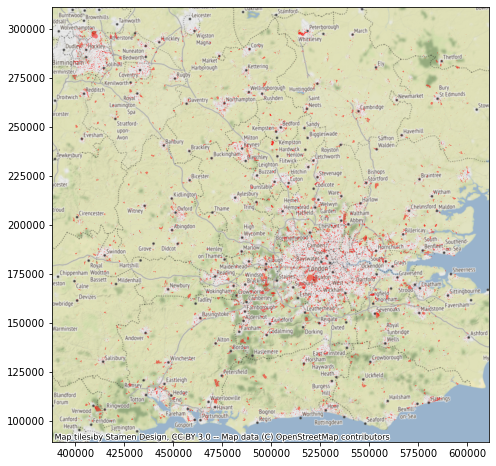

In [17]:
# Plot greenspace geometry
ax = greenspace_gdf.plot(alpha=0.5, color='red', figsize=(12, 8));
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
ctx.add_basemap(ax, crs=greenspace_gdf.crs)

### London Ward Data

#### Accessing London Ward Data

In [18]:
ddir  = os.path.join('data') # destination directory
spath = 'https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/' # source path

londonward = gpd.read_file( cache_data(spath+'2011_london_ward.gpkg?raw=true', ddir) )

print('Done.')

data/2011_london_ward.gpkg not found, downloading!
	Done downloading...
Done.


In [19]:
# Take a look at the London Ward data
londonward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_labelw  0 non-null      object  
 1   geo_label   707 non-null    object  
 2   geo_code    707 non-null    object  
 3   geometry    707 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 22.2+ KB


In [20]:
londonward.head(5)

geo_labelw    geo_label   geo_code  \
0       None     Cazenove  E05000232   
1       None  Leytonstone  E05000605   
2       None    Woodhouse  E05000063   
3       None    New Cross  E05000449   
4       None      Sudbury  E05000101   

                                            geometry  
0  MULTIPOLYGON (((533654.384 186936.977, 533654....  
1  MULTIPOLYGON (((538967.707 187911.084, 538978....  
2  MULTIPOLYGON (((526331.163 192341.020, 526330....  
3  MULTIPOLYGON (((535270.209 177501.208, 535270....  
4  MULTIPOLYGON (((515678.796 185893.064, 515680....

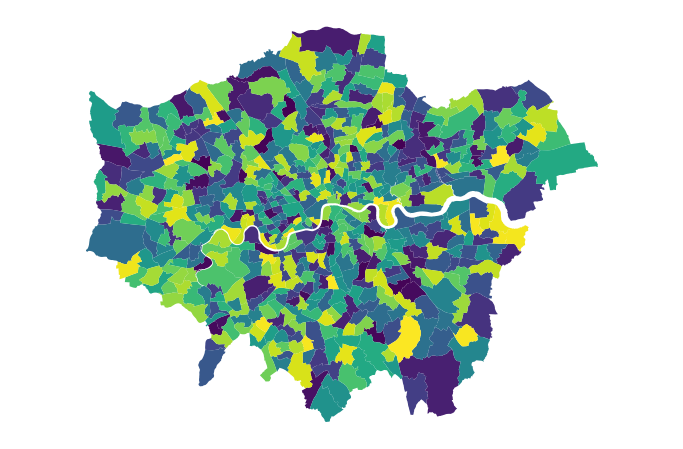

In [21]:
# Plot the London Ward boundary to check
fig, ax = plt.subplots(figsize=(12, 8))

londonward.plot(cmap='viridis',
                       ax=ax,
                    )
 
plt.axis('equal')
ax.set_axis_off()
plt.show()

## Data Processing and Analysis

Our research question is to identify tourism preferences after COVID19 which will be identified through looking at the relationship between:

- Airbnb Average Occupancy rate as dependant variable

and as the independent varible we choose 3 factors which are:

- Population Density
- Tourism Attraction
- Open Green Space

### Population Density Data

In [22]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

In [23]:
#we can use all the functions available in pandas, such as .head()
pd_df.head()

GSS_CODE           Names               Borough Population  Hectares  \
0  E09000001  City of London        City of London          0     315.1   
1  E05000026           Abbey  Barking and Dagenham      8,289     127.9   
2  E05000027          Alibon  Barking and Dagenham     17,574     136.1   
3  E05000028       Becontree  Barking and Dagenham     11,324     128.4   
4  E05000029  Chadwell Heath  Barking and Dagenham     14,751     338.0   

  Square Kilometres  Population per hectare pop_density  Unnamed: 8  \
0               3.2                     0.0           0         NaN   
1               1.3                    64.8       6,481         NaN   
2               1.4                   129.1      12,913         NaN   
3               1.3                    88.2       8,819         NaN   
4               3.4                    43.6       4,364         NaN   

  Census population (2011)  Population per hectare.1  
0                    7,375                      23.4  
1                   12,786                     100.0  
2                   10,385                      76.3  
3                   11,545                      89.9  
4                   10,021                      29.6

In [24]:
## it is important to note that geopandas always has a geometry columns
## here the geoemtries as stored as shapely objects, we should not change
### the name of the geometry column
print(pd_df.columns)

Index(['GSS_CODE', 'Names', 'Borough', 'Population', 'Hectares',
       'Square Kilometres', 'Population per hectare', 'pop_density',
       'Unnamed: 8', 'Census population (2011)', 'Population per hectare.1'],
      dtype='object')


In [25]:
# remove comma in "pop_density"
pd_df = pd_df.replace(',','', regex=True)
pd_df.head()

GSS_CODE           Names               Borough Population  Hectares  \
0  E09000001  City of London        City of London          0     315.1   
1  E05000026           Abbey  Barking and Dagenham       8289     127.9   
2  E05000027          Alibon  Barking and Dagenham      17574     136.1   
3  E05000028       Becontree  Barking and Dagenham      11324     128.4   
4  E05000029  Chadwell Heath  Barking and Dagenham      14751     338.0   

  Square Kilometres  Population per hectare pop_density  Unnamed: 8  \
0               3.2                     0.0           0         NaN   
1               1.3                    64.8        6481         NaN   
2               1.4                   129.1       12913         NaN   
3               1.3                    88.2        8819         NaN   
4               3.4                    43.6        4364         NaN   

  Census population (2011)  Population per hectare.1  
0                     7375                      23.4  
1                    12786                     100.0  
2                    10385                      76.3  
3                    11545                      89.9  
4                    10021                      29.6

In [26]:
# "pop_density"
# transfer object to numeric 
ints  = ['pop_density']
for i in ints:
    print(f"Converting {i}")
    pd_df[i] = pd_df[i].astype('float')

Converting pop_density


In [27]:
#londonward_rename = londonward.rename(columns = {'NAME':'Name'},inplace = True)
pd_df_rename = pd_df.rename(columns = {'GSS_CODE':'geo_code'},inplace = True)

In [28]:
londonward.head()

geo_labelw    geo_label   geo_code  \
0       None     Cazenove  E05000232   
1       None  Leytonstone  E05000605   
2       None    Woodhouse  E05000063   
3       None    New Cross  E05000449   
4       None      Sudbury  E05000101   

                                            geometry  
0  MULTIPOLYGON (((533654.384 186936.977, 533654....  
1  MULTIPOLYGON (((538967.707 187911.084, 538978....  
2  MULTIPOLYGON (((526331.163 192341.020, 526330....  
3  MULTIPOLYGON (((535270.209 177501.208, 535270....  
4  MULTIPOLYGON (((515678.796 185893.064, 515680....

In [29]:
pd_df.head()

geo_code           Names               Borough Population  Hectares  \
0  E09000001  City of London        City of London          0     315.1   
1  E05000026           Abbey  Barking and Dagenham       8289     127.9   
2  E05000027          Alibon  Barking and Dagenham      17574     136.1   
3  E05000028       Becontree  Barking and Dagenham      11324     128.4   
4  E05000029  Chadwell Heath  Barking and Dagenham      14751     338.0   

  Square Kilometres  Population per hectare  pop_density  Unnamed: 8  \
0               3.2                     0.0          0.0         NaN   
1               1.3                    64.8       6481.0         NaN   
2               1.4                   129.1      12913.0         NaN   
3               1.3                    88.2       8819.0         NaN   
4               3.4                    43.6       4364.0         NaN   

  Census population (2011)  Population per hectare.1  
0                     7375                      23.4  
1                    12786                     100.0  
2                    10385                      76.3  
3                    11545                      89.9  
4                    10021                      29.6

<AxesSubplot:>

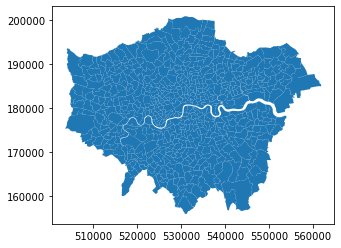

In [30]:
# Join Population data with London Ward boundary by attribute GSS_CODE
pd_gdf = londonward.merge(pd_df, on = 'geo_code', how = 'left')
pd_gdf.plot()

In [31]:
pd_gdf.to_csv('./gdf_outer.csv')

In [32]:
print(pd_df.shape[0])
print(londonward.shape[0])

626
707


In [33]:
pd_gdf.isna().sum(axis=0).sort_values(ascending=False)[:12]

geo_labelw                  707
Unnamed: 8                  707
Names                        83
Borough                      83
Population                   83
Hectares                     83
Square Kilometres            83
Population per hectare       83
pop_density                  83
Census population (2011)     83
Population per hectare.1     83
geo_label                     0
dtype: int64

In [34]:
londonward.to_csv('./londonward.csv')

In [35]:
pd_df.to_csv('./pd.csv')

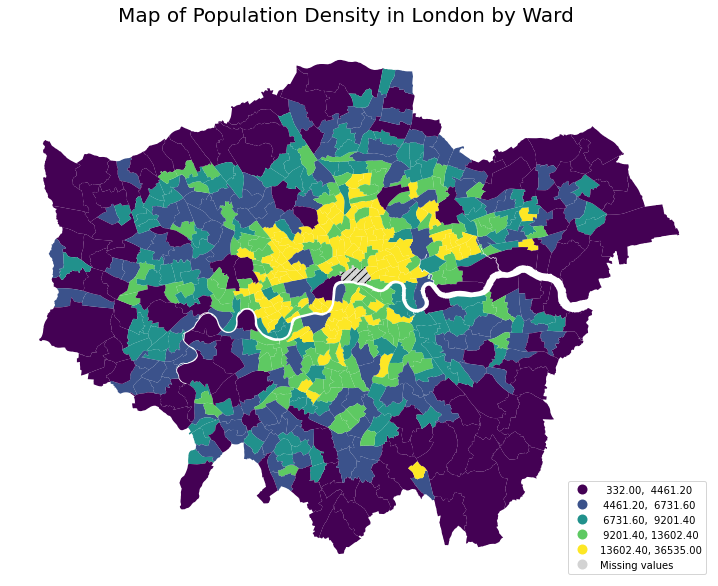

Creating img under /home/jovyan/work/FSDS/fsds_assess


<Figure size 432x288 with 0 Axes>

In [36]:
# plot it
# Set up figure and axis
fig, ax = plt.subplots(1,1, figsize=(15, 10))
fig.suptitle(f"Map of Population Density in London by Ward", fontsize=20, y=0.92)
# Plot the equal interval choropleth and add a legend
pd_gdf.plot(
    column='pop_density', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4},
    missing_kwds={
    "color": "lightgrey",
    "hatch": "///",
    "label": "Missing values",}
)
# Remove the axes
ax.set_axis_off()
# Set the title
#ax.set_title("Total Number of Green Space in London by Ward Boundary")
# Add dark basemap
#cx.add_basemap(
#    ax, 
#    crs="EPSG:27700",
#    source=cx.providers.CartoDB.DarkMatterNoLabels
#)
# Draw map
plt.show()

# Save the image
path = 'img'
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'total_population_density.png'), dpi=300)

### Tourism Attraction Data

#### Clipping the Tourism Attraction Data

In [37]:
# check if they are in the same crs
print("tourism attraction crs:", tourism_df.crs)
print("londonward crs:", londonward.crs)

tourism attraction crs: epsg:4326
londonward crs: epsg:27700


In [38]:
# Transform the data into projected crs EPSG:27700 (British National Grid)
tourism_attract = tourism_df.to_crs(epsg=27700)

In [39]:
tourism_attract.head(5)

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   

                                             geometry  
element_type osmid                                     
node         25524252   POINT (529481.011 179353.082)  
             26559743   POINT (529134.041 167872.849)  
             252602371  POINT (532775.283 180338.459)  
             269236138  POINT (527477.497 163391.245)  
             293221901  POINT (550210.279 174346.124)

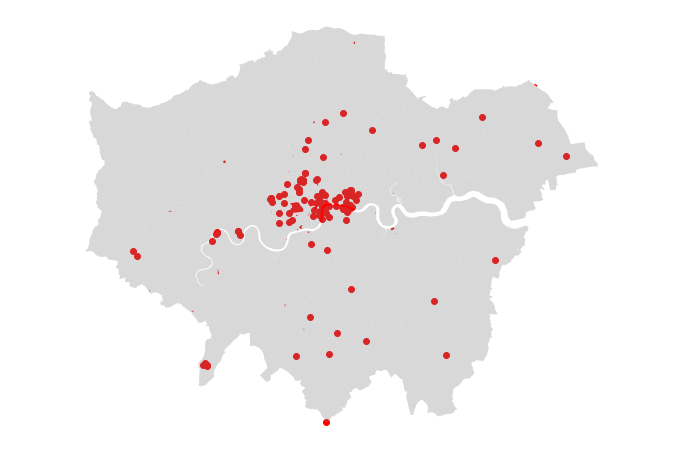

In [40]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

tourism_attract.plot(alpha=1,
                        color="red",
                         ax=ax,
                    )

londonward.plot(color='grey',
                       ax=ax,
                       alpha=.3,
                    )

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [41]:
# Clip the data using GeoPandas clip
tourism_clip = gpd.clip(tourism_attract, londonward)

# View the first 5 rows and a few select columns
tourism_clip.head()

name     tourism  \
element_type osmid                                                      
node         7574982627  Southernmost Point of Gtr London  attraction   
way          825382682               The Brixton Windmill  attraction   
             118720812            St John's, Smith Square  attraction   
relation     8244923                   Little Dean's Yard  attraction   
way          136105050                        Jewel Tower  attraction   

                                                                  geometry  
element_type osmid                                                          
node         7574982627                      POINT (530898.802 155854.283)  
way          825382682   POLYGON ((530457.769 174364.012, 530458.467 17...  
             118720812   POLYGON ((530109.956 179125.586, 530119.242 17...  
relation     8244923     POLYGON ((530066.731 179362.979, 530028.824 17...  
way          136105050   POLYGON ((530146.349 179392.991, 530148.950 17...

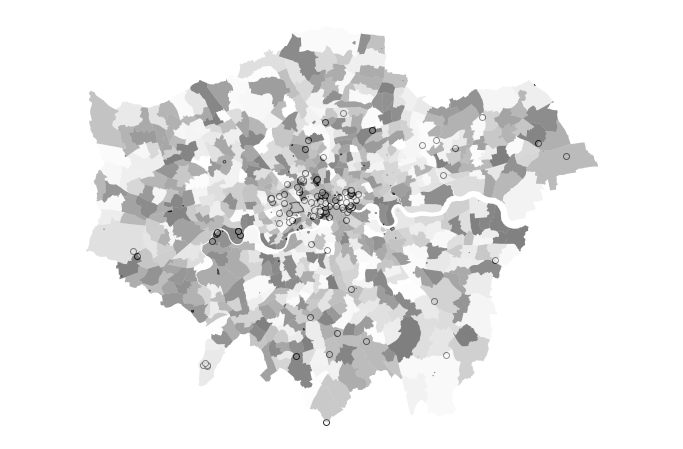

In [42]:
# Plot the clipped data
fig, ax = plt.subplots(figsize=(12, 8))

tourism_clip.plot(alpha=.8,
                         color="white",
                         edgecolor="black",
                         ax=ax)

londonward.plot(cmap="Greys",
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Calculating the Tourism Attraction Centroid

In [43]:
# Calculating centroid of tourism attraction polygon and multipolygon

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

tourism_centroid = tourism_clip

tourism_clip['geometry'] = tourism_clip['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x)
)

tourism_centroid.head(5)

name     tourism  \
element_type osmid                                                      
node         7574982627  Southernmost Point of Gtr London  attraction   
way          825382682               The Brixton Windmill  attraction   
             118720812            St John's, Smith Square  attraction   
relation     8244923                   Little Dean's Yard  attraction   
way          136105050                        Jewel Tower  attraction   

                                              geometry  
element_type osmid                                      
node         7574982627  POINT (530898.802 155854.283)  
way          825382682   POINT (530460.423 174362.209)  
             118720812   POINT (530116.804 179110.967)  
relation     8244923     POINT (530045.922 179381.813)  
way          136105050   POINT (530150.540 179387.474)

In [44]:
tourism_centroid.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 310 entries, ('node', 7574982627) to ('way', 158347149)
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      309 non-null    object  
 1   tourism   310 non-null    object  
 2   geometry  310 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 19.2+ KB


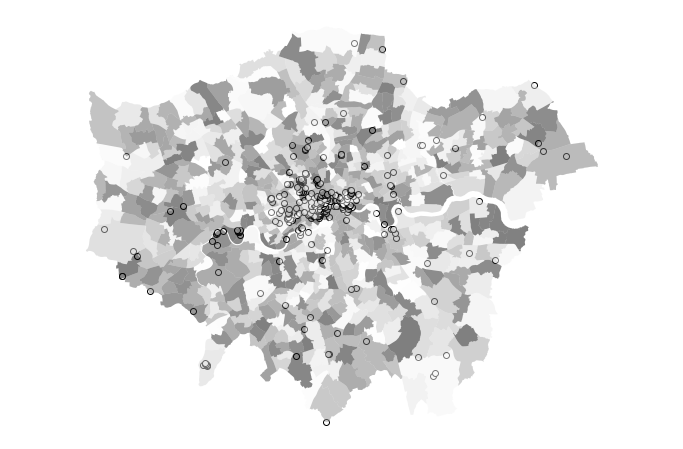

In [45]:
# Plot the greenspace centroid
fig, ax = plt.subplots(figsize=(12, 8))

tourism_centroid.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax,
                        label = 'Greenspace \nLocations'
                    )

londonward.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Defining tourism attraction centroid in each ward

First we calculate the points inside the ward area polygon. Since we dont have the same attributes to join, we use spatial join and define every centroids within each ward polygon

Reference: 
https://geopandas.org/en/latest/docs/user_guide/mergingdata.html https://stackoverflow.com/questions/71579502/merging-pandas-file-with-osmnx

In [46]:
tourism_in_ward = tourism_centroid.sjoin(londonward, how="inner", predicate='intersects')

tourism_in_ward.head()

name     tourism  \
element_type osmid                                                      
node         7574982627  Southernmost Point of Gtr London  attraction   
way          825382682               The Brixton Windmill  attraction   
             118720812            St John's, Smith Square  attraction   
relation     8244923                   Little Dean's Yard  attraction   
way          136105050                        Jewel Tower  attraction   

                                              geometry  index_right  \
element_type osmid                                                    
node         7574982627  POINT (530898.802 155854.283)          356   
way          825382682   POINT (530460.423 174362.209)          674   
             118720812   POINT (530116.804 179110.967)          266   
relation     8244923     POINT (530045.922 179381.813)          266   
way          136105050   POINT (530150.540 179387.474)          266   

                        geo_labelw      geo_label   geo_code  
element_type osmid                                            
node         7574982627       None  Coulsdon East  E05000150  
way          825382682        None   Brixton Hill  E05000417  
             118720812        None     St James's  E05000644  
relation     8244923          None     St James's  E05000644  
way          136105050        None     St James's  E05000644

#### Counting the number of tourism attraction in each ward

We counted the number of tourism attraction in each London ward to use it as a variable in finding the relationship between tourists' preference and tourism attraction. 

In [47]:
# Counting greenspace centroids by ward
tourism_by_ward = tourism_in_ward.groupby("geo_code").size()

# Checking
tourism_by_ward.head(5)

geo_code
E05000015    1
E05000026    1
E05000029    1
E05000064    1
E05000073    1
dtype: int64

In [48]:
# Assign counts into a table of its own 
# and joins it to the areas table
tourism_count_ward = londonward.join(
    pd.DataFrame({"tourism_attraction_total": tourism_by_ward}),
    on="geo_code"
)

tourism_count_ward.head(5)

geo_labelw    geo_label   geo_code  \
0       None     Cazenove  E05000232   
1       None  Leytonstone  E05000605   
2       None    Woodhouse  E05000063   
3       None    New Cross  E05000449   
4       None      Sudbury  E05000101   

                                            geometry  tourism_attraction_total  
0  MULTIPOLYGON (((533654.384 186936.977, 533654....                       NaN  
1  MULTIPOLYGON (((538967.707 187911.084, 538978....                       NaN  
2  MULTIPOLYGON (((526331.163 192341.020, 526330....                       NaN  
3  MULTIPOLYGON (((535270.209 177501.208, 535270....                       1.0  
4  MULTIPOLYGON (((515678.796 185893.064, 515680....                       NaN

In [49]:
# Calculate the total number of green space in London
tourism_london = tourism_count_ward["tourism_attraction_total"].sum()

print("The total of tourism attraction in London are",tourism_london,".")

The total of tourism attraction in London are 309.0 .


In [50]:
# Convert NA values to 0
tourism_count_ward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   geo_labelw                0 non-null      object  
 1   geo_label                 707 non-null    object  
 2   geo_code                  707 non-null    object  
 3   geometry                  707 non-null    geometry
 4   tourism_attraction_total  105 non-null    float64 
dtypes: float64(1), geometry(1), object(3)
memory usage: 27.7+ KB


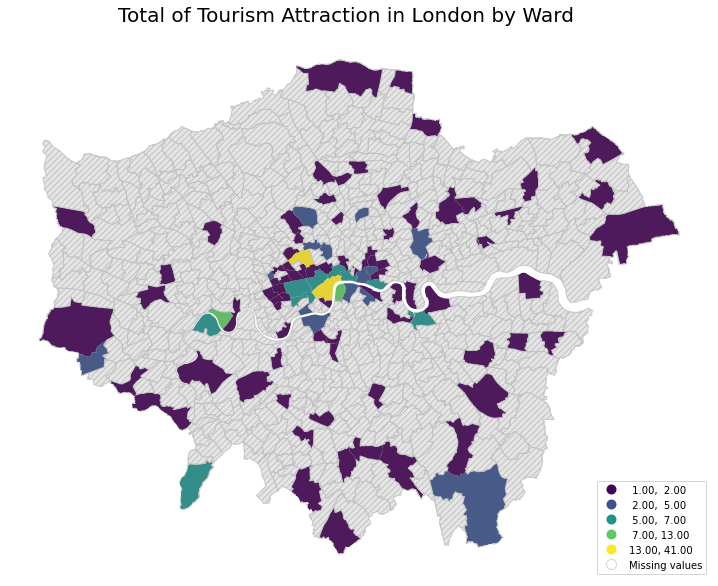

In [51]:
# Set up figure and axis
fig, ax = plt.subplots(1,1, figsize=(15,10))
fig.suptitle(f"Total of Tourism Attraction in London by Ward", fontsize=20, y=0.92)
# Plot the equal interval choropleth and add a legend
tourism_count_ward.plot(
    column='tourism_attraction_total', 
    scheme='natural_breaks', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4},
    missing_kwds={
    "color": "white",
    "edgecolor": "lightgrey",
    "hatch": "////",
    "label": "Missing values",}
)
# Remove the axes
ax.set_axis_off()
# Set the title
#ax.set_title("Quantile Map of Tourism Attraction Counts by London Ward Boundary")
# Add london ward basemap
londonward.plot(color='grey',
                       ax=ax,
                       alpha=.2)
# Draw map
plt.show()

In [52]:
# Saving the tourism attraction total counts by ward data into local path
path = os.path.join('data')
filenm = 'tourism_attraction.csv'

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
tourism_count_ward.to_csv(os.path.join(path,filenm), index=False)
print("Done.")

Done.


After storing the data into local path, we push the data to [github remote repository](https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/tourism_attraction.csv). Then we read the file through the URL to be analysed.

In [53]:
# Read the file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/tourism_attraction.csv"
ta_df = pd.read_csv(url)

ta_df.head(5)

geo_labelw    geo_label   geo_code  \
0         NaN     Cazenove  E05000232   
1         NaN  Leytonstone  E05000605   
2         NaN    Woodhouse  E05000063   
3         NaN    New Cross  E05000449   
4         NaN      Sudbury  E05000101   

                                            geometry  tourism_attraction_total  
0  MULTIPOLYGON (((533654.384 186936.977, 533654....                       NaN  
1  MULTIPOLYGON (((538967.707 187911.084, 538978....                       NaN  
2  MULTIPOLYGON (((526331.163 192341.02, 526330.4...                       NaN  
3  MULTIPOLYGON (((535270.209 177501.208, 535270....                       1.0  
4  MULTIPOLYGON (((515678.796 185893.064, 515680....                       NaN

### Greenspace Data

#### Clipping the Greenspace Data

As mentioned before, the data included four tiles that covered London nearby areas. Now we need to clip our data with London Boundary because our study case location is London.

In [54]:
# check if they are in the same crs
print("greenspace", greenspace_gdf.crs)
print("londonward", londonward.crs)

greenspace epsg:27700
londonward epsg:27700


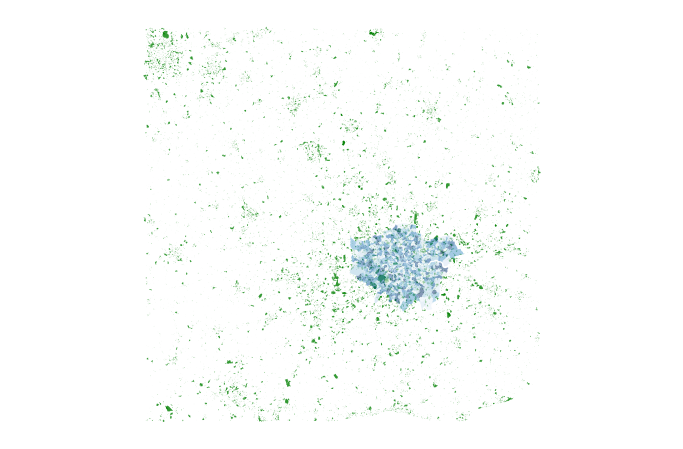

In [55]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_gdf.plot(alpha=.8,
                        color="green",
                         ax=ax,
                    )

londonward.plot(cmap='Blues',
                       ax=ax,
                       alpha=.5,
                    )

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [56]:
# Clip the data using GeoPandas clip
greenspace_clip = gpd.clip(greenspace_gdf, londonward)

# View the first 5 rows and a few select columns
greenspace_clip.head()

id               function  \
43299  E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E  Other Sports Facility   
43439  E56DE74B-960A-13A9-E053-AAEFA00A0D0E      Religious Grounds   
43443  E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E           Tennis Court   
43446  E56DE74B-9587-13A9-E053-AAEFA00A0D0E      Religious Grounds   
43444  E56DE74B-A73D-13A9-E053-AAEFA00A0D0E  Other Sports Facility   

                                      distName1 distName2 distName3 distName4  \
43299                                      None      None      None      None   
43439                                      None      None      None      None   
43443                                      None      None      None      None   
43446  Roman Catholic Church of the Holy Family      None      None      None   
43444                                      None      None      None      None   

                   layer                                               path  \
43299  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43439  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43443  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43446  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43444  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   

                                                geometry  
43299  POLYGON Z ((535015.300 159599.140 0.000, 53501...  
43439  POLYGON Z ((534311.880 160595.980 0.000, 53429...  
43443  POLYGON Z ((534415.150 160731.550 0.000, 53447...  
43446  POLYGON Z ((534250.500 160869.900 0.000, 53427...  
43444  POLYGON Z ((534961.620 160872.400 0.000, 53472...

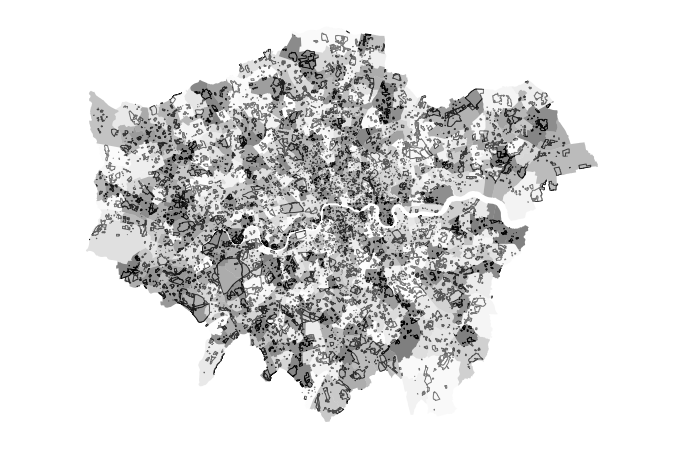

In [57]:
# Plot the clipped data
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_clip.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

londonward.plot(cmap="Greys",
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Calculating the Green Space Centroid

In [58]:
# Calculating centroid of greenspace polygon and multipolygon

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

greenspace_centroid = greenspace_clip

greenspace_clip['geometry'] = greenspace_clip['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x)
)

greenspace_centroid.head(5)

id               function  \
43299  E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E  Other Sports Facility   
43439  E56DE74B-960A-13A9-E053-AAEFA00A0D0E      Religious Grounds   
43443  E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E           Tennis Court   
43446  E56DE74B-9587-13A9-E053-AAEFA00A0D0E      Religious Grounds   
43444  E56DE74B-A73D-13A9-E053-AAEFA00A0D0E  Other Sports Facility   

                                      distName1 distName2 distName3 distName4  \
43299                                      None      None      None      None   
43439                                      None      None      None      None   
43443                                      None      None      None      None   
43446  Roman Catholic Church of the Holy Family      None      None      None   
43444                                      None      None      None      None   

                   layer                                               path  \
43299  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43439  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43443  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43446  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43444  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   

                            geometry  
43299  POINT (534996.280 159576.615)  
43439  POINT (534278.211 160594.285)  
43443  POINT (534507.096 160783.952)  
43446  POINT (534239.463 160835.475)  
43444  POINT (534801.546 160893.843)

In [59]:
greenspace_centroid.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10165 entries, 43299 to 27457
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         10165 non-null  object  
 1   function   10165 non-null  object  
 2   distName1  2752 non-null   object  
 3   distName2  10 non-null     object  
 4   distName3  1 non-null      object  
 5   distName4  0 non-null      object  
 6   layer      10165 non-null  object  
 7   path       10165 non-null  object  
 8   geometry   10165 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 794.1+ KB


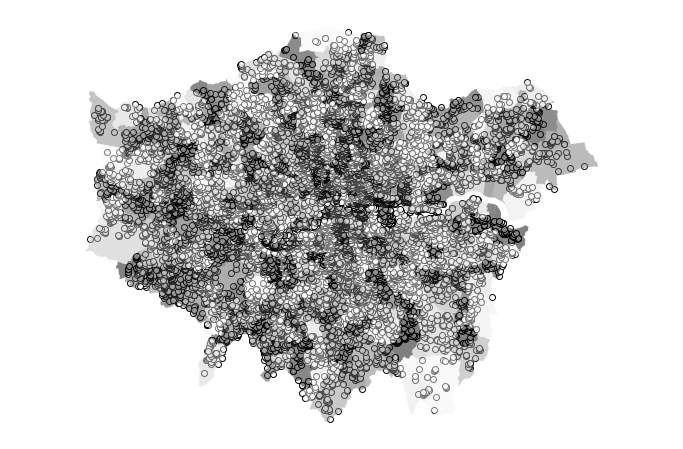

In [60]:
# Plot the greenspace centroid
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_centroid.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax,
                        label = 'Greenspace \nLocations'
                    )

londonward.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Defining Green Space Centroid in Each Ward

First we calculate the points inside the ward area polygon. Since we dont have the same attributes to join, we use spatial join and define every centroids within each ward polygon

Reference: 
https://geopandas.org/en/latest/docs/user_guide/mergingdata.html https://stackoverflow.com/questions/71579502/merging-pandas-file-with-osmnx

In [61]:
greenspace_in_ward = greenspace_centroid.sjoin(londonward, how="inner", predicate='intersects')

greenspace_in_ward.head()

id               function  \
43299  E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E  Other Sports Facility   
43439  E56DE74B-960A-13A9-E053-AAEFA00A0D0E      Religious Grounds   
43443  E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E           Tennis Court   
43446  E56DE74B-9587-13A9-E053-AAEFA00A0D0E      Religious Grounds   
43444  E56DE74B-A73D-13A9-E053-AAEFA00A0D0E  Other Sports Facility   

                                      distName1 distName2 distName3 distName4  \
43299                                      None      None      None      None   
43439                                      None      None      None      None   
43443                                      None      None      None      None   
43446  Roman Catholic Church of the Holy Family      None      None      None   
43444                                      None      None      None      None   

                   layer                                               path  \
43299  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43439  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43443  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43446  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   
43444  TQ_GreenspaceSite  /Users/listianingrumr/Documents/CASA/FSDS/fsds...   

                            geometry  index_right geo_labelw    geo_label  \
43299  POINT (534996.280 159576.615)          501       None  Sanderstead   
43439  POINT (534278.211 160594.285)          501       None  Sanderstead   
43443  POINT (534507.096 160783.952)          501       None  Sanderstead   
43446  POINT (534239.463 160835.475)          501       None  Sanderstead   
43444  POINT (534801.546 160893.843)          501       None  Sanderstead   

        geo_code  
43299  E05000160  
43439  E05000160  
43443  E05000160  
43446  E05000160  
43444  E05000160

In [62]:
greenspace_in_ward.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10157 entries, 43299 to 30112
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           10157 non-null  object  
 1   function     10157 non-null  object  
 2   distName1    2746 non-null   object  
 3   distName2    10 non-null     object  
 4   distName3    1 non-null      object  
 5   distName4    0 non-null      object  
 6   layer        10157 non-null  object  
 7   path         10157 non-null  object  
 8   geometry     10157 non-null  geometry
 9   index_right  10157 non-null  int64   
 10  geo_labelw   0 non-null      object  
 11  geo_label    10157 non-null  object  
 12  geo_code     10157 non-null  object  
dtypes: geometry(1), int64(1), object(11)
memory usage: 1.1+ MB


#### Counting The Number of Green Spaces in Each Ward

We counted the number of green space in each London ward to use it as a variable in finding the relationship between tourism preference and greenspace. 

In [63]:
# Counting greenspace centroids by ward
greenspace_by_ward = greenspace_in_ward.groupby("geo_code").size()

In [64]:
# Checking
greenspace_by_ward.head(5)

geo_code
E05000001     2
E05000015     2
E05000026    11
E05000027     7
E05000028     5
dtype: int64

In [65]:
# Assign counts into a table of its own 
# and joins it to the areas table
greenspace_count_ward = londonward.join(
    pd.DataFrame({"greenspace_count": greenspace_by_ward}),
    on="geo_code"
)

greenspace_count_ward.head(5)
greenspace_count_ward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geo_labelw        0 non-null      object  
 1   geo_label         707 non-null    object  
 2   geo_code          707 non-null    object  
 3   geometry          707 non-null    geometry
 4   greenspace_count  626 non-null    float64 
dtypes: float64(1), geometry(1), object(3)
memory usage: 27.7+ KB


In [66]:
# Calculate the total number of green space in London
greenspace_london = greenspace_count_ward["greenspace_count"].sum()

print("The total of open green space in London are",greenspace_london,".")

The total of open green space in London are 10157.0 .


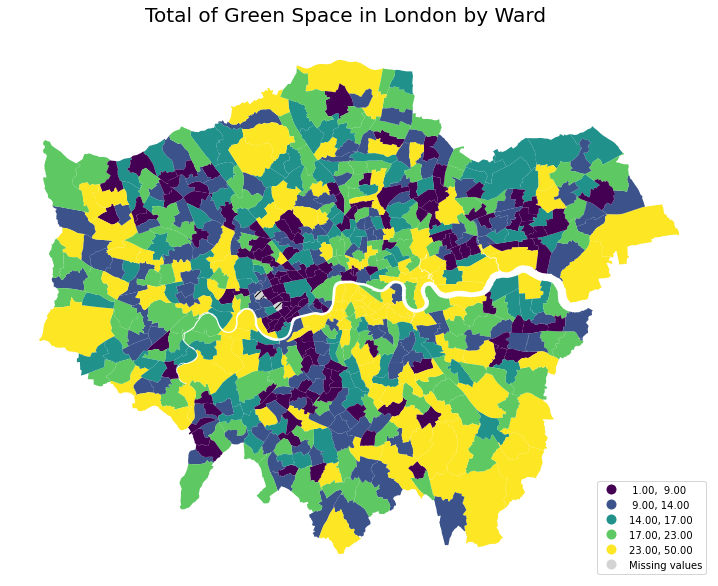

In [67]:
# Set up figure and axis
fig, ax = plt.subplots(1,1, figsize=(15,10))
fig.suptitle(f"Total of Green Space in London by Ward", fontsize=20, y=0.92)
# Plot the equal interval choropleth and add a legend
greenspace_count_ward.plot(
    column='greenspace_count', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4},
    missing_kwds={
    "color": "lightgrey",
    #"edgecolor": "red",
    "hatch": "///",
    "label": "Missing values",}
)
# Remove the axes
ax.set_axis_off()
# Set the title
# ax.set_title("Quantile map of greenspace counts by London Ward boundary")
# Add dark basemap

# Draw map
plt.show()

In [68]:
# Saving the greenspace total count by ward data into local path
path = os.path.join('data')
filenm = 'greenspace.csv'

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd('/Users/listianingrumr/Documents/CASA/FSDS/fsds_assess')}")
    os.makedirs(path)
    
greenspace_count_ward.to_csv(os.path.join(path,filenm), index=False)
print("Done.")

Done.


In [69]:
# Read the file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/greenspace.csv"
gs_df= pd.read_csv(url)

gs_df.head(5)

NAME   GSS_CODE              DISTRICT  LAGSSCODE  \
0       Chessington South  E05000405  Kingston upon Thames  E09000021   
1  Tolworth and Hook Rise  E05000414  Kingston upon Thames  E09000021   
2              Berrylands  E05000401  Kingston upon Thames  E09000021   
3               Alexandra  E05000400  Kingston upon Thames  E09000021   
4                Beverley  E05000402  Kingston upon Thames  E09000021   

   HECTARES  NONLD_AREA                                           geometry  \
0   755.173         0.0  MULTIPOLYGON (((516401.59596424643 160201.8020...   
1   259.464         0.0  MULTIPOLYGON (((519552.9984840818 164295.60020...   
2   145.390         0.0  MULTIPOLYGON (((518107.4991065815 167303.39923...   
3   268.506         0.0  MULTIPOLYGON (((520336.6997870404 165105.49837...   
4   187.821         0.0  MULTIPOLYGON (((521201.2026888144 169275.50472...   

   greenspace_count  
0              22.0  
1               8.0  
2              12.0  
3              23.0  
4              17.0

In [70]:
gs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              657 non-null    object 
 1   GSS_CODE          657 non-null    object 
 2   DISTRICT          657 non-null    object 
 3   LAGSSCODE         657 non-null    object 
 4   HECTARES          657 non-null    float64
 5   NONLD_AREA        657 non-null    float64
 6   geometry          657 non-null    object 
 7   greenspace_count  644 non-null    float64
dtypes: float64(3), object(5)
memory usage: 41.2+ KB


## Airbnb data (Pre-processing)

Aim: our dependent variable which represents the tourists' area(?) preference on choosing accommondation. 
It would be the estimates bookings of Airbnb listings in each area.

Workflow: 

    1. to get the number of review of all the listing has in the last 12 months,
    
    2. and calculate the estimates bookings for each Airbnb listings in the last 12 months according to review rate in London.
    
    3. ...sum up or times _an average length of stay_ (e.g. 5.5 nights)

### read in data

In [71]:
#Cachng the data
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """
    
    cache_data
    
    
    """    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

help(cache_data) # <- This should show the docstring you've written

Help on function cache_data in module __main__:

cache_data(src: str, dest: str) -> str
    cache_data



In [72]:
ddir  = os.path.join('data') # destination directory
spath = 'https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/' # source path

In [73]:
IA_2022 = pd.read_csv( cache_data(spath+'2022-09-10-listings.csv.gz?raw=true', ddir) )
IA_2022.info()
# we should filter out the columns we need.

data/2022-09-10-listings.csv.gz not found, downloading!
	Done downloading...


/tmp/ipykernel_13909/226973713.py:1: DtypeWarning: Columns (0,2,22,41,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  IA_2022 = pd.read_csv( cache_data(spath+'2022-09-10-listings.csv.gz?raw=true', ddir) )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69358 entries, 0 to 69357
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69354 non-null  object 
 1   listing_url                                   69357 non-null  object 
 2   scrape_id                                     69357 non-null  object 
 3   last_scraped                                  69357 non-null  object 
 4   source                                        69358 non-null  object 
 5   name                                          69337 non-null  object 
 6   description                                   67839 non-null  object 
 7   neighborhood_overview                         39966 non-null  object 
 8   picture_url                                   69358 non-null  object 
 9   host_id                                       69358 non-null 

In [74]:
IA_2019 = pd.read_csv(cache_data(spath+'London-2019-11-listings.csv.gz?raw=true', ddir),low_memory=False)
IA_2019.info()
# we need to fix the data type.

data/London-2019-11-listings.csv.gz not found, downloading!
	Done downloading...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85236 entries, 0 to 85235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85236 non-null  object
 1   name                            85236 non-null  object
 2   host_id                         85236 non-null  object
 3   host_name                       85236 non-null  object
 4   neighbourhood_group             85236 non-null  object
 5   neighbourhood                   85236 non-null  object
 6   latitude                        85236 non-null  object
 7   longitude                       85236 non-null  object
 8   room_type                       85236 non-null  object
 9   price                           85236 non-null  object
 10  minimum_nights                  85236 non-null  object
 11  number_of_reviews        

### clean data

In [75]:
# select the column we need
df_raw1 = IA_2022
df_raw2 = IA_2019
print(df_raw1.columns.to_list())
print(df_raw2.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [76]:
IA_2019.head()

id                                               name    host_id  \
0   9582415  Single/Twin/Double Ensuite near Twickenham Sta...   49602995   
1  23013522    Spacious room with double bed for 2, Twickenham   70374572   
2  25796711  Stunning Central London Apartment Close The River   25587547   
3  29060134     Recently renovated fabulous four bedroom house   57607790   
4  30374086    Lovely cosy flat for 4 in Heart of North London  228095684   

  host_name neighbourhood_group           neighbourhood  latitude longitude  \
0   Daniela                        Richmond upon Thames  51.44473     -.379   
1      Monk                                    Hounslow  51.45867   -.34444   
2   Matthew                      Hammersmith and Fulham  51.47398   -.21531   
3   Shofraz                                  Hillingdon  51.52716   -.44164   
4    Yashar                                      Barnet  51.59118    -.1667   

         room_type price minimum_nights number_of_reviews last_review  \
0     Private room    35              1                47  2019-11-06   
1     Private room    19              1               131  2019-11-06   
2  Entire home/apt   103              7                 8  2019-11-06   
3  Entire home/apt    85             14                 5  2019-11-06   
4  Entire home/apt    85              3                16  2019-11-06   

  reviews_per_month calculated_host_listings_count availability_365  \
0              2.27                              1              278   
1              6.52                              3               23   
2               .51                              1              317   
3                .4                              1              346   
4              1.52                              3              139   

        room_class last_review_timestamp  
0     Private room     11/6/2019 0:00:00  
1     Private room     11/6/2019 0:00:00  
2  Entire home/apt     11/6/2019 0:00:00  
3  Entire home/apt     11/6/2019 0:00:00  
4  Entire home/apt     11/6/2019 0:00:00

#### filter out the columns (2022 dataset)

In [77]:
# select the columns we may need. All fields about review are reserved.
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 
        'host_since','host_listings_count', 'host_total_listings_count', 
        'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights','minimum_minimum_nights', 'availability_365', 
        'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']

In [78]:
df1 = df_raw1[cols]
#df1.sample(5)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69358 entries, 0 to 69357
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           69354 non-null  object 
 1   listing_url                  69357 non-null  object 
 2   last_scraped                 69357 non-null  object 
 3   name                         69337 non-null  object 
 4   description                  67839 non-null  object 
 5   host_id                      69358 non-null  float64
 6   host_name                    69353 non-null  object 
 7   host_since                   69353 non-null  object 
 8   host_listings_count          69346 non-null  object 
 9   host_total_listings_count    69345 non-null  float64
 10  latitude                     69351 non-null  float64
 11  longitude                    69351 non-null  float64
 12  property_type                69351 non-null  object 
 13  room_type       

In [79]:
df1.sample(5)[['latitude','longitude', 'property_type', 'minimum_nights','number_of_reviews', 'number_of_reviews_ltm']]

latitude  longitude                property_type minimum_nights  \
32877  51.53185   -0.08176  Private room in rental unit              1   
24312  51.54341   -0.35058         Private room in home              1   
16611  51.54637   -0.17072           Entire rental unit              3   
26407  51.52808   -0.12027           Entire rental unit              3   
34161  51.48866   -0.18921  Private room in rental unit              2   

       number_of_reviews  number_of_reviews_ltm  
32877               20.0                    0.0  
24312              132.0                   46.0  
16611                2.0                    0.0  
26407               55.0                    0.0  
34161                4.0                    0.0

#### fixing data type (2019 dataset)

In [80]:
df2 = IA_2019

In [81]:
df2['reviews_per_month']

0        2.27
1        6.52
2         .51
3          .4
4        1.52
         ... 
85231        
85232        
85233        
85234        
85235        
Name: reviews_per_month, Length: 85236, dtype: object

In [82]:
# there was some empty string in the dataset...
df2 = df2.replace(r'^\s*$', np.nan, regex=True)

In [83]:
# transfer "object" to numeric 
ints  = ['latitude', 'longitude', 'price', 
         'number_of_reviews', 'reviews_per_month','minimum_nights']
for i in ints:
    print(f"Converting {i}")
    df2[i] = df2[i].astype('float')

Converting latitude
Converting longitude
Converting price
Converting number_of_reviews
Converting reviews_per_month
Converting minimum_nights


In [84]:
# check that they have been changed to float
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85236 entries, 0 to 85235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  object 
 1   name                            85056 non-null  object 
 2   host_id                         84912 non-null  object 
 3   host_name                       84900 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   84911 non-null  object 
 6   latitude                        84911 non-null  float64
 7   longitude                       84911 non-null  float64
 8   room_type                       84911 non-null  object 
 9   price                           84911 non-null  float64
 10  minimum_nights                  84911 non-null  float64
 11  number_of_reviews               84911 non-null  float64
 12  last_review                     

#### listings with missing values

##### check the missing values

keep "0-review" listings.

In [85]:
df1.isna().sum(axis=0).sort_values(ascending=False)[:12]

license                        69358
review_scores_value            17849
review_scores_checkin          17848
review_scores_location         17846
review_scores_communication    17815
review_scores_accuracy         17814
review_scores_cleanliness      17801
review_scores_rating           16792
reviews_per_month              16792
last_review                    16787
first_review                   16785
description                     1519
dtype: int64

In [86]:
df1[df1['number_of_reviews_ltm'].isna()]

id                                      listing_url  \
9103           10128178.0            https://www.airbnb.com/rooms/10128178   
23112          22063217.0            https://www.airbnb.com/rooms/22063217   
52563          53422816.0            https://www.airbnb.com/rooms/53422816   
53487          53899858.0            https://www.airbnb.com/rooms/53899858   
63388  670608541728038282  https://www.airbnb.com/rooms/670608541728038282   
64775  680821702646368182  https://www.airbnb.com/rooms/680821702646368182   
66384  694611321916822413  https://www.airbnb.com/rooms/694611321916822413   

      last_scraped                                               name  \
9103    2022-09-11       Homely flat in Central Haggerston/Shoreditch   
23112   2022-09-12           Beautiful Vintage Apartment - BRICK LANE   
52563   2022-09-11  Spacious, central 1-bed flat in Zone 2 East Lo...   
53487   2022-09-12   Large 1 bed flat - Haggerston station/Shoreditch   
63388   2022-09-11         Stunning one bedroom flat in London fields   
64775   2022-09-11     Cozy studio in the heart of Angel with garden.   
66384   2022-09-11                   Perfect one bed in London Fields   

                                             description     host_id  \
9103   This is a lived in apartment with two medium s...    233649.0   
23112                      <b>The space</b><br />Parejas   1824036.0   
52563  We've newly refurbished our 1-bed apartment fo...  30626999.0   
53487  Enjoy a stylish experience at this centrally-l...    233649.0   
63388  A beautifully renovated Victorian flat on the ...   7969940.0   
64775  Welcome to my lovely studio located in the hea...   8029384.0   
66384  Kick back and relax in this calm, stylish spac...   7969940.0   

      host_name  host_since host_listings_count  host_total_listings_count  \
9103   Michelle  2010-09-13                 NaN                        NaN   
23112      Arya  2012-02-28                 NaN                        NaN   
52563    Sitara  2015-04-05                 NaN                        NaN   
53487  Michelle  2010-09-13                 NaN                        NaN   
63388     Jenny  2013-08-06                 NaN                        NaN   
64775   Melania  2013-08-08                 NaN                        NaN   
66384     Jenny  2013-08-06                 NaN                        NaN   

       ...  last_review  review_scores_rating review_scores_accuracy  \
9103   ...          NaN                   NaN                    NaN   
23112  ...          NaN                   NaN                    NaN   
52563  ...          NaN                   NaN                    NaN   
53487  ...          NaN                   NaN                    NaN   
63388  ...          NaN                   NaN                    NaN   
64775  ...          NaN                   NaN                    NaN   
66384  ...          NaN                   NaN                    NaN   

      review_scores_cleanliness  review_scores_checkin  \
9103                        NaN                    NaN   
23112                       NaN                    NaN   
52563                       NaN                    NaN   
53487                       NaN                    NaN   
63388                       NaN                    NaN   
64775                       NaN                    NaN   
66384                       NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
9103                          NaN                    NaN                 NaN   
23112                         NaN                    NaN                 NaN   
52563                         NaN                    NaN                 NaN   
53487                         NaN                    NaN                 NaN   
63388                         NaN                    NaN                 NaN   
64775                         NaN                    NaN                 NaN   
66384    

There is 7 null values in column 'number_of_reviews_ltm' in IA_2022. After opening the Airbnb page for each listings, we can see they are active listings in operation and also have reviews. We assumpt that the value were losen for some unknown technical problem while scraping. However they make up a very small part of the dataset. 

Therefore, these listings would be dropped.

In [87]:
df2.isnull().sum(axis=0).sort_values(ascending=False)

neighbourhood_group               85236
last_review_timestamp             20298
reviews_per_month                 20298
last_review                       20298
host_name                           336
minimum_nights                      325
availability_365                    325
calculated_host_listings_count      325
number_of_reviews                   325
price                               325
room_type                           325
longitude                           325
latitude                            325
neighbourhood                       325
host_id                             324
name                                180
id                                  168
room_class                            0
dtype: int64

In [88]:
no_rev_2019 = df2[df2['reviews_per_month'].isna()]
no_rev_2019

id                                               name    host_id  \
64938     38151                                Double room/ lounge     163634   
64939     38950   Room 1 Large Double Bedroom - front ground floor     167107   
64940     38995                    ROOM IN CONTEMPORARY STYLE FLAT     167281   
64941     40228          Room 4 Cosy Double Bedroom on First Floor     167107   
64942     96008                 Light airy double bedroom for rent     510424   
...         ...                                                ...        ...   
85231  39868875                 The Apartment, East London Village   13553423   
85232  39869123    Elegant stylish modern house with amazing view!   21145791   
85233  39869214                  Holland Road - Kensington Olympia  251922260   
85234  39869249     Functional single room 18 min to London Bridge  255372486   
85235  39869282  EXQUISITE APARTMENT, PEACEFUL ENVIRONMENT IN SOHO  210531062   

       host_name  neighbourhood_group           neighbourhood  latitude  \
64938       Lisa                  NaN                 Croydon  51.41940   
64939       Paul                  NaN                Haringey  51.58730   
64940          C                  NaN               Southwark  51.47892   
64941       Paul                  NaN                Haringey  51.58860   
64942     Dionne                  NaN                 Lambeth  51.43923   
...          ...                  ...                     ...       ...   
85231    Melissa                  NaN          Waltham Forest  51.58208   
85232     Ingrid                  NaN                  Merton  51.40628   
85233  Christian                  NaN  Hammersmith and Fulham  51.50244   
85234     Nudrat                  NaN                 Bromley  51.35742   
85235       Radi                  NaN             Westminster  51.51090   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
64938   -0.08722     Private room   65.0             1.0                0.0   
64939   -0.08606     Private room   45.0             1.0                0.0   
64940   -0.06040     Private room   45.0             1.0                0.0   
64941   -0.08805     Private room   29.0             1.0                0.0   
64942   -0.10421     Private room   80.0             2.0                0.0   
...          ...              ...    ...             ...                ...   
85231   -0.00915  Entire home/apt   70.0             3.0                0.0   
85232   -0.23244     Private room   69.0             2.0                0.0   
85233   -0.21547  Entire home/apt   90.0             3.0                0.0   
85234    0.10764     Private room   30.0             2.0                0.0   
85235   -0.12480  Entire home/apt  187.0             1.0                0.0   

      last_review  reviews_per_month calculated_host_listings_count  \
64938         NaN                NaN                              1   
64939         NaN                NaN                              4   
64940         NaN                NaN                              1   
64941         NaN                NaN                              4   
64942         NaN                NaN                              1   
...           ...                ...                            ...   
85231         NaN                NaN                              1   
85232         NaN                NaN                              2   
85233         NaN                NaN                              4   
85234         NaN                NaN                              4   
85235         NaN                NaN                              1   

      availability_365       room_class last_review_timestamp  
64938              365     Private room                   NaN  
64939               90     Private room                   NaN  
64940               87     Private room                   NaN  
64941               45     Private room                   NaN  
64942            

In [89]:
# mapping these listings
df_t = no_rev_2019

In [90]:
gdf = gpd.GeoDataFrame(df_t, 
      geometry=gpd.points_from_xy(df_t.longitude, df_t.latitude, crs='epsg:4326'))

In [91]:
print(f"The bottom-left corner is {df_t.longitude.min()}, {df_t.latitude.min()}")
print(f"The top-right corner is {df_t.longitude.max()}, {df_t.latitude.max()}")

The bottom-left corner is -0.49668, 51.29813
The top-right corner is 0.28539, 51.67651


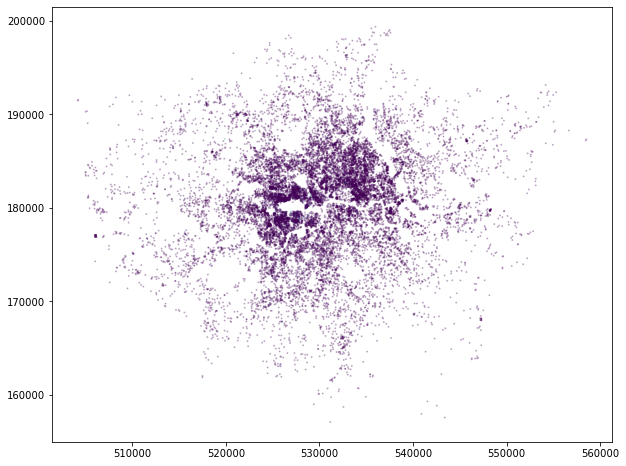

In [92]:
gdf.to_crs('EPSG: 27700').plot(column='price', cmap='viridis', alpha=0.25, markersize=1, figsize=(12,8));

There are 20298 missing values in column 'reviews_per_month' in IA_2019. Obviously, We are not able to check each listing manually. 

Yet from the date frame table, it seems like they are a large number of listings which have no review at all but have other normal information, such as various room types and different prices. Can the 'no review' be evidence of inactiveness? Maybe they are just “part-time” Airbnb houses and have little bookings. 

Considering our aim is to calculate the occupancy rate for each listing and get the average occupancy rate for all the listings in each ward to represent the tourist’s preference, the amount of listings would affect the result directly. 

Additionaly, on the map above, it's shown that these listings locate around London.

Therefore, these ‘0-review’ listings are reserved and whose number of review/occupancy rate would be calculated as zero.

##### deal with df1 (2022 dataset)

In [93]:
# drop rows in df1 (2022 dataset)
df1.drop(df1[df1.number_of_reviews_ltm.isna()].index.array, axis=0, inplace=True)
# check
df1[df1.number_of_reviews_ltm.isna()]

/tmp/ipykernel_13909/3931092351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1[df1.number_of_reviews_ltm.isna()].index.array, axis=0, inplace=True)


Empty DataFrame
Columns: [id, listing_url, last_scraped, name, description, host_id, host_name, host_since, host_listings_count, host_total_listings_count, latitude, longitude, property_type, room_type, accommodates, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, license, reviews_per_month]
Index: []

[0 rows x 35 columns]

##### deal with df2 (2019 dataset)

In [94]:
df2.columns.get_loc("reviews_per_month")

13

In [95]:
df2.columns.get_loc("number_of_reviews")

11

In [96]:
# set 0 value to 'reviews_per_month' field for these "no-review" listings in df2 (2019 dataset)
# but there should be a more reproducable way to define rows with NA. For example, used the index of rows with NA.
df2.iloc[64938:85236,13] = 0

In [97]:
# check
df2.reviews_per_month.isna().sum()

0

### the occupancy model

The Occupancy Model is constructed by following the modified methodology from Inside Airbnb and ...

1. review rate

    A review rate of 50% is used to convert reviews to estimated bookings.

2. The average length of stay
The average length of stay is assumed as 5.3 days in this study and is taken from the Airbnb report and London first report.
Airbnb reported 5.4 nights as the average length of stay for guests using Airbnb in London, but the study examined data from November 2012 to October 2013.
London First study gave a figure of 5.3 nights on the average length of stay for international guests using Airbnb accommodation in London in 2019.

3. If a listing has a higher minimum nights value than the average length of stay, the minimum nights value was used instead.

#### estimate the length of stay

According to our third assumption in Occupancy model, if a listing has a higher minimum nights value than the average length of stay (5.3 days), the minimum nights value was used instead.

<AxesSubplot:>

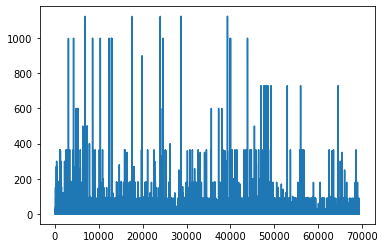

In [98]:
# have a look first
df1.minimum_minimum_nights.plot.line()

There are many listings set minumum nights as 365 or more than 1000 days, which must be an unreal situation. I assumpt it to be a temporary restrictions on booking. For these listings, we still use average length of stay as the estimate of length of stay. Additionaly, 90-days Airbnb Rule should also be considered. 
Therefore, we set the rule as below.

<AxesSubplot:>

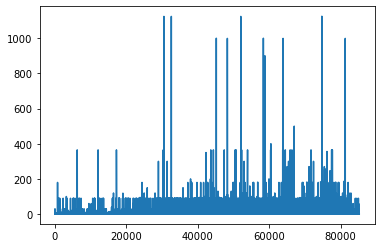

In [99]:
df2.minimum_nights.plot.line()

In [100]:
result = []
for n in df1.minimum_minimum_nights:
    if n < 5.3 or n > 90:
        result.append(5.3)
    else:
        night = n 
        result.append(night)
        
df1["leng_stay"] = result
df1[["leng_stay","minimum_nights"]].head(10)

/tmp/ipykernel_13909/3606302505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["leng_stay"] = result


leng_stay minimum_nights
0        5.3              1
1        5.3              3
2        5.3              5
3        5.3              3
4        5.3              4
5        5.3              4
6        5.3              2
7       14.0             14
8        5.3              3
9        5.3              3

In [101]:
result = []
for n in df2.minimum_nights:
    if n < 5.3 or n > 90:
        result.append(5.3)
    else:
        night = n 
        result.append(night)
        
df2["leng_stay"] = result
df2[["leng_stay","minimum_nights"]].head()

leng_stay  minimum_nights
0        5.3             1.0
1        5.3             1.0
2        7.0             7.0
3       14.0            14.0
4        5.3             3.0

#### Calculate the occupancy rate

In [102]:
review_rate = 0.5

# Airbnb 2022 
df1['total_bookings_2022'] = df1['number_of_reviews_ltm']/ review_rate
df1['occupancy_rate_2022'] = df1['total_bookings_2022'] * df1['leng_stay']/ 365
df1[['occupancy_rate_2022','total_bookings_2022','number_of_reviews_ltm']]

/tmp/ipykernel_13909/1453605176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_bookings_2022'] = df1['number_of_reviews_ltm']/ review_rate
/tmp/ipykernel_13909/1453605176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['occupancy_rate_2022'] = df1['total_bookings_2022'] * df1['leng_stay']/ 365


occupancy_rate_2022  total_bookings_2022  number_of_reviews_ltm
0                 0.261370                 18.0                    9.0
1                 0.000000                  0.0                    0.0
2                 0.029041                  2.0                    1.0
3                 0.000000                  0.0                    0.0
4                 0.232329                 16.0                    8.0
...                    ...                  ...                    ...
69353             0.029041                  2.0                    1.0
69354             0.348493                 24.0                   12.0
69355             0.174247                 12.0                    6.0
69356             0.116164                  8.0                    4.0
69357             0.493699                 34.0                   17.0

[69351 rows x 3 columns]

In [103]:
# Airbnb 2019 
df2['total_bookings_2019'] = df2['reviews_per_month']*12 /review_rate
df2['occupancy_rate_2019'] = df2['total_bookings_2019'] * df2['leng_stay']/ 365
df2[['occupancy_rate_2019','total_bookings_2019','number_of_reviews','reviews_per_month','minimum_nights']]

occupancy_rate_2019  total_bookings_2019  number_of_reviews  \
0                 0.791079                54.48               47.0   
1                 2.272175               156.48              131.0   
2                 0.234740                12.24                8.0   
3                 0.368219                 9.60                5.0   
4                 0.529710                36.48               16.0   
...                    ...                  ...                ...   
85231             0.000000                 0.00                0.0   
85232             0.000000                 0.00                0.0   
85233             0.000000                 0.00                0.0   
85234             0.000000                 0.00                0.0   
85235             0.000000                 0.00                0.0   

       reviews_per_month  minimum_nights  
0                   2.27             1.0  
1                   6.52             1.0  
2                   0.51             7.0  
3                   0.40            14.0  
4                   1.52             3.0  
...                  ...             ...  
85231               0.00             3.0  
85232               0.00             2.0  
85233               0.00             3.0  
85234               0.00             2.0  
85235               0.00             1.0  

[85236 rows x 5 columns]

**Control Occupancy rate**

Some listings have comparatively large amount of review per month/year, so the estimated occupancy rate can be too large, up to 1 or even larger, maybe because of their real average length of stay is smaller than 5.3. 

The occupancy rate is capped at 70%, which is used in IA's "San Francisco Model", a relatively high, but reasonable number for a highly occupied "hotel".
Therefore, below is the final step to revise the estimated occupancy rate.

In [104]:
# control the occupancy rate as 70%
revised = []
for n in df2.occupancy_rate_2019:
    if n > 0.7:
        revised.append(0.7)
    else:
        revised.append(n)

df2["occupancy_rate_2019_revised"] = revised 
df2["occupancy_rate_2019_revised"]

0        0.700000
1        0.700000
2        0.234740
3        0.368219
4        0.529710
           ...   
85231    0.000000
85232    0.000000
85233    0.000000
85234    0.000000
85235    0.000000
Name: occupancy_rate_2019_revised, Length: 85236, dtype: float64

In [105]:
# control the occupancy rate as 70%
revised2022 = []
for n in df1.occupancy_rate_2022:
    if n > 0.7:
        revised2022.append(0.7)
    else:
        revised2022.append(n)

df1["occupancy_rate_2022_revised"] = revised2022
df1["occupancy_rate_2022_revised"]

/tmp/ipykernel_13909/680774702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["occupancy_rate_2022_revised"] = revised2022


0        0.261370
1        0.000000
2        0.029041
3        0.000000
4        0.232329
           ...   
69353    0.029041
69354    0.348493
69355    0.174247
69356    0.116164
69357    0.493699
Name: occupancy_rate_2022_revised, Length: 69351, dtype: float64

<AxesSubplot:ylabel='Frequency'>

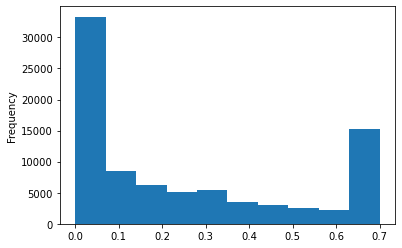

In [106]:
df2["occupancy_rate_2019_revised"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

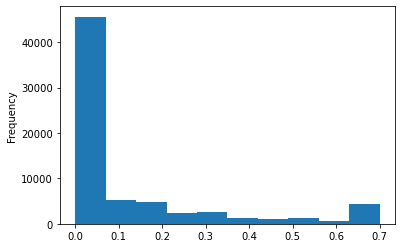

In [107]:
df1["occupancy_rate_2022_revised"].plot.hist()

### Join Airbnb listings with ward

#### read in London ward geodata

In [108]:
# Add London Ward Boundary Data
# this can be deleted after combining our notebooks.
londonward = gpd.read_file( cache_data(spath+'2011_london_ward.gpkg?raw=true', ddir) )

Found data/2011_london_ward.gpkg locally!


In [109]:
londonward.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<AxesSubplot:>

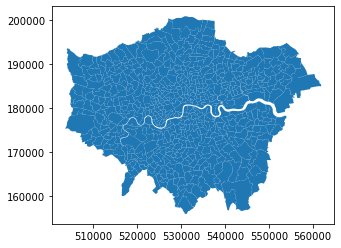

In [110]:
londonward.plot()

#### transfer csv to geodata

In [111]:
gdf_Airbnb2022 = gpd.GeoDataFrame(df1, 
      geometry=gpd.points_from_xy(df1.longitude, df1.latitude, crs='epsg:4326'))

In [112]:
gdf_Airbnb2019 = gpd.GeoDataFrame(df2, 
      geometry=gpd.points_from_xy(df2.longitude, df2.latitude, crs='epsg:4326'))

In [113]:
for g in [gdf_Airbnb2019]:
    print(g.crs)

epsg:4326


In [114]:
print(gdf_Airbnb2019.geometry.crs)
print(gdf_Airbnb2019.total_bounds)
print(gdf_Airbnb2022.geometry.crs)
print(gdf_Airbnb2022.total_bounds)

epsg:4326
[-0.49668 51.29479  0.28539 51.68169]
epsg:4326
[-5.236000e-01  2.000000e+00  1.125000e+03  5.170893e+01]


#### reproject the Airbnb

In [115]:
# check its crs
gdf_Airbnb2019 = gdf_Airbnb2019.to_crs('EPSG:27700')
gdf_Airbnb2022 = gdf_Airbnb2022.to_crs('EPSG:27700')
print(gdf_Airbnb2019.geometry.crs)
print(gdf_Airbnb2019.total_bounds)
print(gdf_Airbnb2022.geometry.crs)
print(gdf_Airbnb2022.total_bounds)

EPSG:27700
[504189.9384281  157077.66437635 558509.91187284 199932.45808543]
EPSG:27700
[  502615.87511762 -5304347.19481622               inf               inf]


We found there are some junk rows with random wrong information in latitude and longitude columns. So we choose to clip our data with London Boundary.

In [116]:
# Clip the data using GeoPandas clip
gdf_Airbnb2022_clip = gpd.clip(gdf_Airbnb2022, londonward)

In [117]:
print(f"Data frame of Airbnb 2022 after clipping is {gdf_Airbnb2022_clip.shape[0]} x {gdf_Airbnb2022_clip.shape[1]}")
print(f"Data frame of Airbnb 2019 is {gdf_Airbnb2019.shape[0]} x {gdf_Airbnb2019.shape[1]}")

Data frame of Airbnb 2022 after clipping is 68590 x 40
Data frame of Airbnb 2019 is 85236 x 23


<AxesSubplot:ylabel='Frequency'>

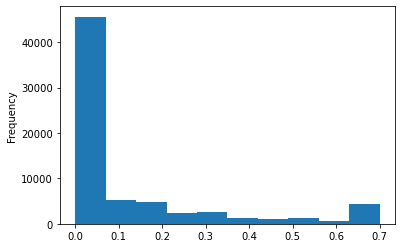

In [118]:
gdf_Airbnb2022["occupancy_rate_2022_revised"].plot.hist()

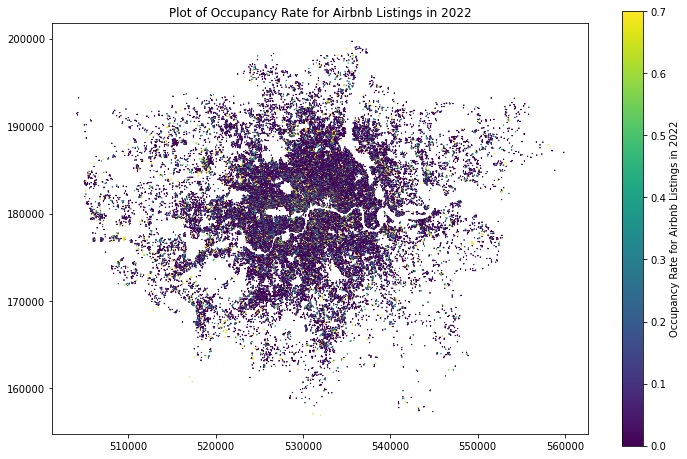

In [119]:
# plot Airbnb listings in 2019
ax = gdf_Airbnb2022_clip.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='occupancy_rate_2022_revised', cmap='viridis', 
         legend=True, legend_kwds={"label": "Occupancy Rate for Airbnb Listings in 2022"});  #legend_kwds: legend keywords
ax.set_title("Plot of Occupancy Rate for Airbnb Listings in 2022");

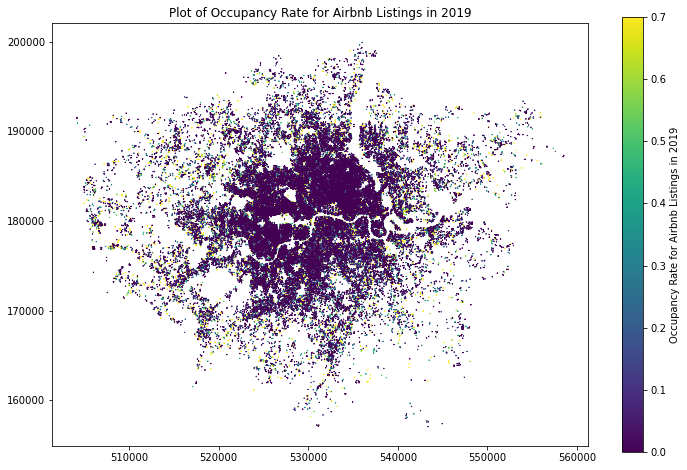

In [120]:
# plot Airbnb listings in 2019
ax = gdf_Airbnb2019.plot(figsize=(12,8), marker='*', markersize=0.25, 
         column='occupancy_rate_2019_revised', cmap='viridis', 
         legend=True, legend_kwds={"label": "Occupancy Rate for Airbnb Listings in 2019"});  #legend_kwds: legend keywords
ax.set_title("Plot of Occupancy Rate for Airbnb Listings in 2019");

<AxesSubplot:>

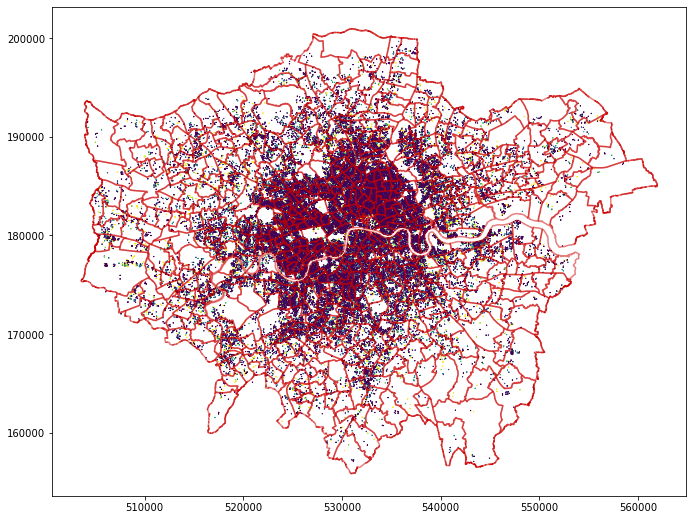

In [121]:
# Plot Airbnb listings and London ward to the same axes
# to have a look.
# Creates a new figure with specified number of subplots and the specified size (in inches by default).
fig, ax = plt.subplots(1,1, figsize=(12,9))

gdf_Airbnb2019.plot(column='occupancy_rate_2019_revised', marker='*', markersize=0.25, cmap='viridis', ax=ax)
londonward.plot(edgecolor=(0.8, 0, 0, 0.5), facecolor='none', linewidth=1.5, ax=ax)

#### join two datasets and calculate the variable

We use spatial join to define Airbnb listings in each ward. Then, group by and calculate the average occupancy rate of each ward as the dependent variable.

In [122]:
Airbnb2019_in_ward = gdf_Airbnb2019.sjoin(londonward, how="inner", predicate='intersects')
Airbnb2019_in_ward.head()

id                                               name    host_id  \
0      9582415  Single/Twin/Double Ensuite near Twickenham Sta...   49602995   
3802  14236471           Ensuite single modern room in twickenham   86566410   
4292  35463539  2 Bed Semi on 1 level  Free parking Wi-Fi & Ga...  266812235   
5224  36389486             Double Room in Lovely Home -Twickenham   30537142   
7403  32174432          2 Bed  Bungalow+garden+parking Free Wi-fi   80107186   

             host_name  neighbourhood_group         neighbourhood  latitude  \
0              Daniela                  NaN  Richmond upon Thames  51.44473   
3802             Yorgo                  NaN  Richmond upon Thames  51.44941   
4292             Derek                  NaN  Richmond upon Thames  51.44694   
5224  Lizzette&Barnaby                  NaN  Richmond upon Thames  51.44624   
7403             Jenny                  NaN  Richmond upon Thames  51.44810   

      longitude        room_type  price  ...  last_review_timestamp  \
0      -0.37900     Private room   35.0  ...      11/6/2019 0:00:00   
3802   -0.36235     Private room   27.0  ...      11/1/2019 0:00:00   
4292   -0.38079  Entire home/apt   85.0  ...      11/1/2019 0:00:00   
5224   -0.36824     Private room   24.0  ...     10/31/2019 0:00:00   
7403   -0.38174  Entire home/apt   85.0  ...     10/28/2019 0:00:00   

      leng_stay total_bookings_2019  occupancy_rate_2019  \
0           5.3               54.48             0.791079   
3802        5.3               53.52             0.777140   
4292        5.3               38.16             0.554104   
5224        5.3               47.04             0.683047   
7403        5.3               74.64             1.083814   

     occupancy_rate_2019_revised                       geometry index_right  \
0                       0.700000  POINT (512750.672 172994.812)         544   
3802                    0.700000  POINT (513896.087 173540.987)         544   
4292                    0.554104  POINT (512620.848 173237.826)         544   
5224                    0.683047  POINT (513494.671 173179.332)         544   
7403                    0.700000  POINT (512551.984 173365.366)         544   

     geo_labelw   geo_label   geo_code  
0          None  Heathfield  E05000523  
3802       None  Heathfield  E05000523  
4292       None  Heathfield  E05000523  
5224       None  Heathfield  E05000523  
7403       None  Heathfield  E05000523  

[5 rows x 27 columns]

In [123]:
Airbnb2022_in_ward = gdf_Airbnb2022_clip.sjoin(londonward, how="inner", predicate='intersects')
Airbnb2022_in_ward.head()

id                                      listing_url  \
52718            53453460.0            https://www.airbnb.com/rooms/53453460   
49451            50849897.0            https://www.airbnb.com/rooms/50849897   
57683    614802885788128798  https://www.airbnb.com/rooms/614802885788128798   
56052  589178624979678208.0  https://www.airbnb.com/rooms/589178624979678210   
47151              48583067            https://www.airbnb.com/rooms/48583067   

      last_scraped                                             name  \
52718   2022-09-10              Log cabin rurally located 1 bedroom   
49451   2022-09-11        Secluded Log cabin surrounded with nature   
57683   2022-09-10  Luxury accommodation with use of kitchen/lounge   
56052   2022-09-11                        Delightful granary studio   
47151   2022-09-11     Luxury London Sunset Glamping Tent and Field   

                                             description      host_id  \
52718  Rurally located log cabin with great transport...  432830379.0   
49451  Relax with the whole family at this peaceful p...   75151381.0   
57683  Beautiful bedroom with king size bed in a grad...  150690857.0   
56052  A very old granary lovingly converted into a l...   36224509.0   
47151  Luxurious 5 metre bell tent with proper double...  391124223.0   

      host_name  host_since host_listings_count  host_total_listings_count  \
52718    Daniel  2021-11-21                 1.0                        1.0   
49451      Evie  2016-06-01                 2.0                        2.0   
57683  Michelle  2017-09-15                 1.0                        1.0   
56052       Lou  2015-06-19                 1.0                        1.0   
47151    Kieran  2021-03-04                 1.0                        1.0   

       ...  reviews_per_month  leng_stay total_bookings_2022  \
52718  ...                NaN        5.3                 0.0   
49451  ...               1.47        5.3                28.0   
57683  ...               1.84        5.3                 6.0   
56052  ...                NaN        5.3                 0.0   
47151  ...               1.17        5.3                12.0   

      occupancy_rate_2022  occupancy_rate_2022_revised  \
52718            0.000000                     0.000000   
49451            0.406575                     0.406575   
57683            0.087123                     0.087123   
56052            0.000000                     0.000000   
47151            0.174247                     0.174247   

                            geometry index_right geo_labelw  \
52718  POINT (548891.184 163761.884)         324       None   
49451  POINT (548755.366 163927.091)         324       None   
57683  POINT (548251.177 164108.310)         324       None   
56052  POINT (548713.432 164117.083)         324       None   
47151  POINT (546299.382 161432.323)         324       None   

                          geo_label   geo_code  
52718  Chelsfield and Pratts Bottom  E05000110  
49451  Chelsfield and Pratts Bottom  E05000110  
57683  Chelsfield and Pratts Bottom  E05000110  
56052  Chelsfield and Pratts Bottom  E05000110  
47151  Chelsfield and Pratts Bottom  E05000110  

[5 rows x 44 columns]

In [124]:
# calculate the average occupancy rate in each ward
aver_occup_rate_2019 = Airbnb2019_in_ward.groupby('geo_code')['occupancy_rate_2019_revised'].mean()
aver_occup_rate_2019.head()

geo_code
E05000001    0.317288
E05000015    0.149882
E05000026    0.240206
E05000027    0.295671
E05000028    0.139687
Name: occupancy_rate_2019_revised, dtype: float64

In [125]:
# calculate the average occupancy rate in each ward
aver_occup_rate_2022 = Airbnb2022_in_ward.groupby('geo_code')['occupancy_rate_2022_revised'].mean()
aver_occup_rate_2022.head()

geo_code
E05000001    0.129800
E05000015    0.143836
E05000026    0.115240
E05000027    0.077788
E05000028    0.132107
Name: occupancy_rate_2022_revised, dtype: float64

In [126]:
# join the average rate back to ward
Ward_Airbnb_2019 = londonward.merge(aver_occup_rate_2019, on='geo_code', how='left')
Ward_Airbnb_2019.head()

geo_labelw    geo_label   geo_code  \
0       None     Cazenove  E05000232   
1       None  Leytonstone  E05000605   
2       None    Woodhouse  E05000063   
3       None    New Cross  E05000449   
4       None      Sudbury  E05000101   

                                            geometry  \
0  MULTIPOLYGON (((533654.384 186936.977, 533654....   
1  MULTIPOLYGON (((538967.707 187911.084, 538978....   
2  MULTIPOLYGON (((526331.163 192341.020, 526330....   
3  MULTIPOLYGON (((535270.209 177501.208, 535270....   
4  MULTIPOLYGON (((515678.796 185893.064, 515680....   

   occupancy_rate_2019_revised  
0                     0.178328  
1                     0.216254  
2                     0.142844  
3                     0.227013  
4                     0.393321

In [127]:
# join the average rate back to ward
Ward_Airbnb_2022 = londonward.merge(aver_occup_rate_2022, on='geo_code', how='left')
Ward_Airbnb_2022.head()

geo_labelw    geo_label   geo_code  \
0       None     Cazenove  E05000232   
1       None  Leytonstone  E05000605   
2       None    Woodhouse  E05000063   
3       None    New Cross  E05000449   
4       None      Sudbury  E05000101   

                                            geometry  \
0  MULTIPOLYGON (((533654.384 186936.977, 533654....   
1  MULTIPOLYGON (((538967.707 187911.084, 538978....   
2  MULTIPOLYGON (((526331.163 192341.020, 526330....   
3  MULTIPOLYGON (((535270.209 177501.208, 535270....   
4  MULTIPOLYGON (((515678.796 185893.064, 515680....   

   occupancy_rate_2022_revised  
0                     0.057010  
1                     0.096739  
2                     0.084639  
3                     0.086953  
4                     0.153050

#### deal with the outlier

### Save file locally

create an folder to save analytical output.

In [128]:
# create an folder to save analytical output.
path = os.path.join('data','analytical') # A default location to save data
#fn   = url.split('/')[-1]         # What does this do?  #Jin: the filename is contained in the url after the last slash

#print(f"Writing to: {fn}")
#print(url)
print(path)

data/analytical


save csv file locally

In [129]:
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

gdf1 = Ward_Airbnb_2022
gdf2 = Ward_Airbnb_2019
gdf1.to_csv(os.path.join(path, "Ward_Airbnb_2022.csv"), index=False)
gdf2.to_csv(os.path.join(path, "Ward_Airbnb_2019.csv"), index=False)
print("Done.")

Creating data/analytical under /home/jovyan/work/FSDS/fsds_assess
Done.


save map plot file locally

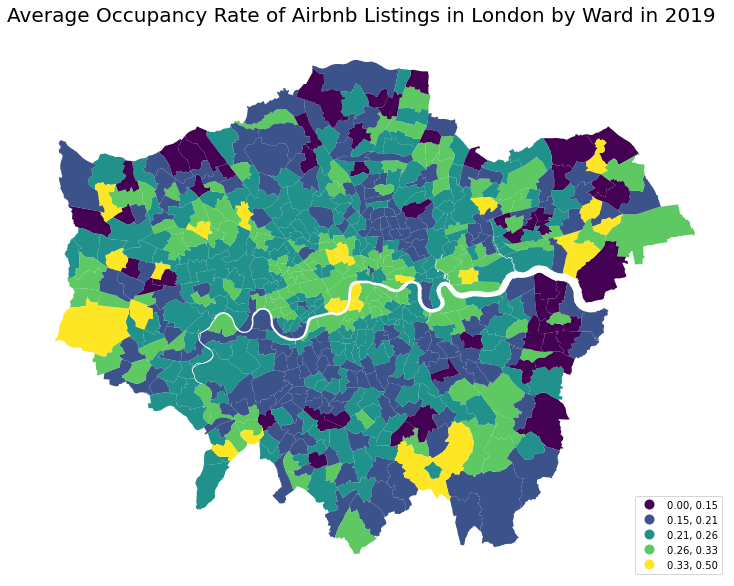

In [130]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(15,10))
fig.suptitle(f"Average Occupancy Rate of Airbnb Listings in London by Ward in 2019", fontsize=20, y=0.92)
Ward_Airbnb_2019.plot(ax=ax, scheme='natural_breaks', legend_kwds={"loc": 4}, column='occupancy_rate_2019_revised',legend=True)

# Save the image
ax.set_axis_off()
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'occupancy_rate_Airbnb_Ward_2019.png'), dpi=300)

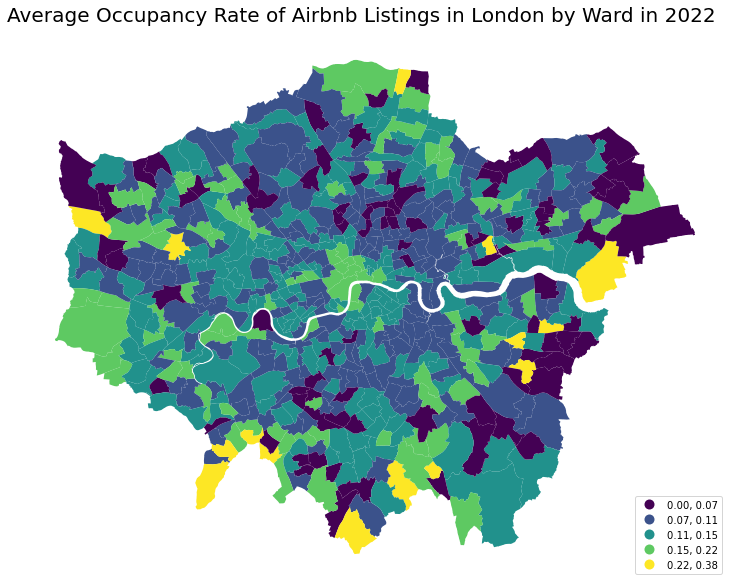

In [131]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(15,10))
fig.suptitle(f"Average Occupancy Rate of Airbnb Listings in London by Ward in 2022", fontsize=20, y=0.92)
Ward_Airbnb_2022.plot(ax=ax, scheme='natural_breaks', legend_kwds={"loc": 4}, column='occupancy_rate_2022_revised',legend=True)

ax.set_axis_off()

# Save the image
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'occupancy_rate_2022.png'), dpi=300)

## Analysis

### change between

In [132]:
# add to a dataframe
Ward_Airbnb_2022["occupancy_rate_2019_revised"] = Ward_Airbnb_2019["occupancy_rate_2019_revised"]
Ward_Airbnb_2022[["occupancy_rate_2019_revised","geo_code"]]

occupancy_rate_2019_revised   geo_code
0                       0.178328  E05000232
1                       0.216254  E05000605
2                       0.142844  E05000063
3                       0.227013  E05000449
4                       0.393321  E05000101
..                           ...        ...
702                          NaN  E05007391
703                     0.168904  E05000424
704                     0.196120  E05000030
705                     0.302276  E05000302
706                     0.250979  E05000580

[707 rows x 2 columns]

In [133]:
Ward_Airbnb_2022["change_occpc_rate"] = Ward_Airbnb_2022["occupancy_rate_2022_revised"]-Ward_Airbnb_2022["occupancy_rate_2019_revised"] 

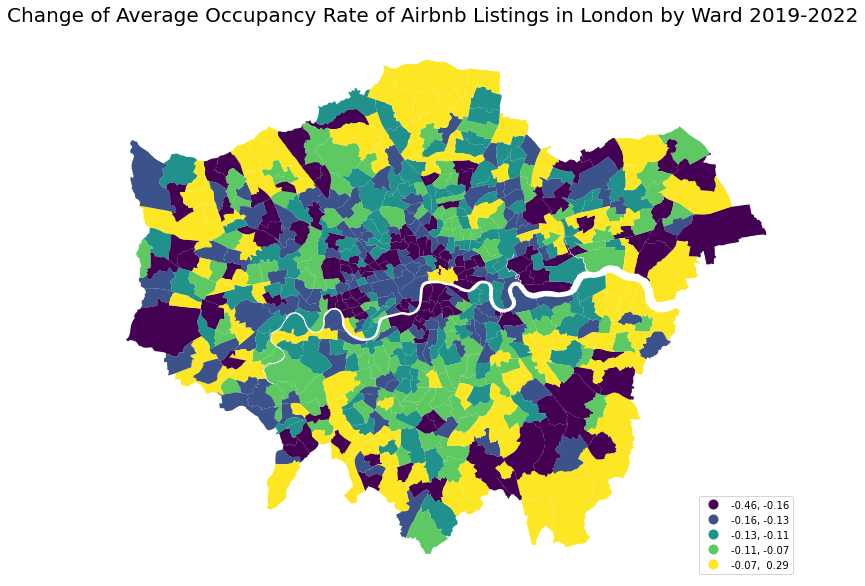

In [134]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(15,10))
fig.suptitle(f"Change of Average Occupancy Rate of Airbnb Listings in London by Ward 2019-2022", fontsize=20, y=0.92)
Ward_Airbnb_2022.plot(ax=ax, 
                      scheme='quantiles', legend_kwds={"loc": 4},column='change_occpc_rate',legend=True)

ax.set_axis_off()
# Save the image
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'occupancy_rate_change.png'), dpi=300)